# HDFC Bank Stock Analysis and Prediction
# Comprehensive machine learning analysis for predicting stock price movements

# SECTION 1: DATA DOWNLOAD AND LIBRARIES

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_curve, auc, precision_recall_curve, average_precision_score)
from sklearn.feature_selection import SelectKBest, f_classif
import warnings
warnings.filterwarnings('ignore')

# Set HDFC Bank colors
HDFC_BLUE = "#004C8F"  # HDFC Bank's blue color
HDFC_RED = "#D71A28"   # HDFC Bank's red color
HDFC_GREEN = "#00A650" # Added green for additional visuals

# Set plotting style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Blues_r')

# Download HDFC Bank stock data
print("Downloading HDFC Bank stock data...")
hdfc_data = yf.download("HDFCBANK.NS", start="2014-01-01", end="2023-01-01")

# Display the first 5 rows
print("First 5 rows of data:")
print(hdfc_data.head())

# Display basic statistics
print("\nBasic Statistics:")
print(hdfc_data.describe())

# Check for missing values
print("\nMissing values in the dataset:")
print(hdfc_data.isnull().sum())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

First 5 rows of data:
Price            Close        High         Low        Open      Volume
Ticker     HDFCBANK.NS HDFCBANK.NS HDFCBANK.NS HDFCBANK.NS HDFCBANK.NS
Date                                                                  
2014-01-01  305.065735  307.198403  304.079643  306.372853     2246218
2014-01-02  301.327789  309.468685  299.745469  304.996925     3614496
2014-01-03  304.125488  305.455561  298.117289  299.034573     3256592
2014-01-06  303.483398  304.079627  301.327776  304.079627     2981710
2014-01-07  304.721741  307.725840  299.630798  305.960052     3948460

Basic Statistics:
Price         Close         High          Low         Open        Volume
Ticker  HDFCBANK.NS  HDFCBANK.NS  HDFCBANK.NS  HDFCBANK.NS   HDFCBANK.NS
count   2220.000000  2220.000000  2220.000000  2220.000000  2.220000e+03
mean     910.976445   919.490576   902.048469   911.085085  6.110817e+06
std      382.328697   386.138248   378.449356   382.392387  6.742680e+06
min      287.339233   290.

# SECTION 2: ENHANCED EXPLORATORY DATA ANALYSIS

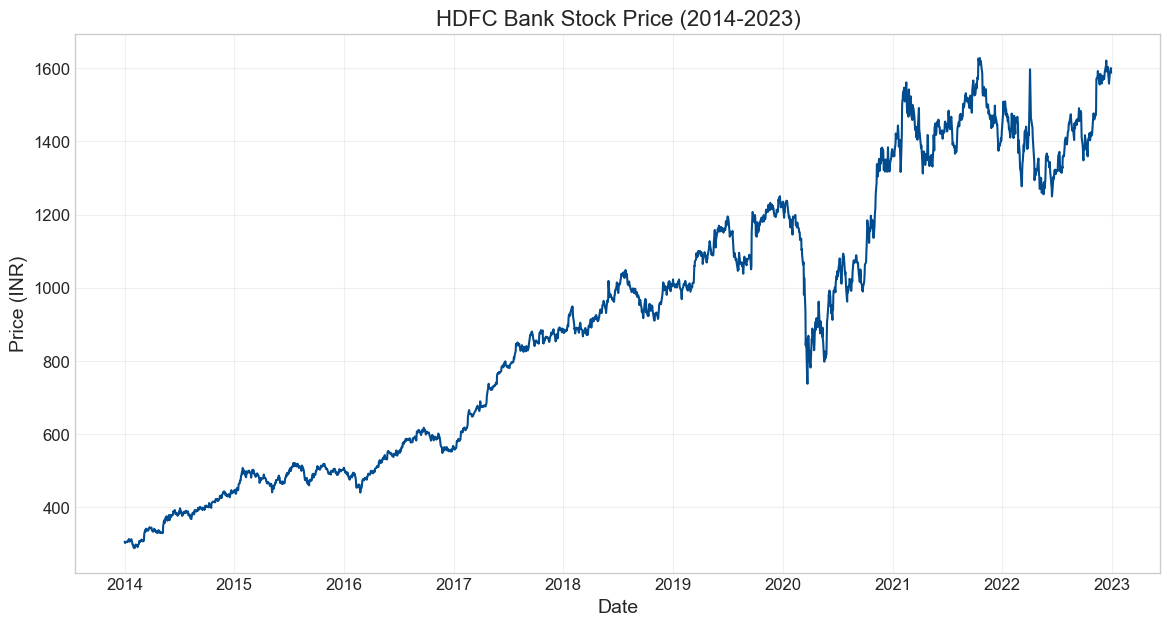

Data columns: MultiIndex([(         'Close', 'HDFCBANK.NS'),
            (          'High', 'HDFCBANK.NS'),
            (           'Low', 'HDFCBANK.NS'),
            (          'Open', 'HDFCBANK.NS'),
            (        'Volume', 'HDFCBANK.NS'),
            (  'Daily_Return',            ''),
            ('Volatility_30d',            '')],
           names=['Price', 'Ticker'])
Data types: Price           Ticker     
Close           HDFCBANK.NS    float64
High            HDFCBANK.NS    float64
Low             HDFCBANK.NS    float64
Open            HDFCBANK.NS    float64
Volume          HDFCBANK.NS      int64
Daily_Return                   float64
Volatility_30d                 float64
dtype: object
Shape: (2220, 7)


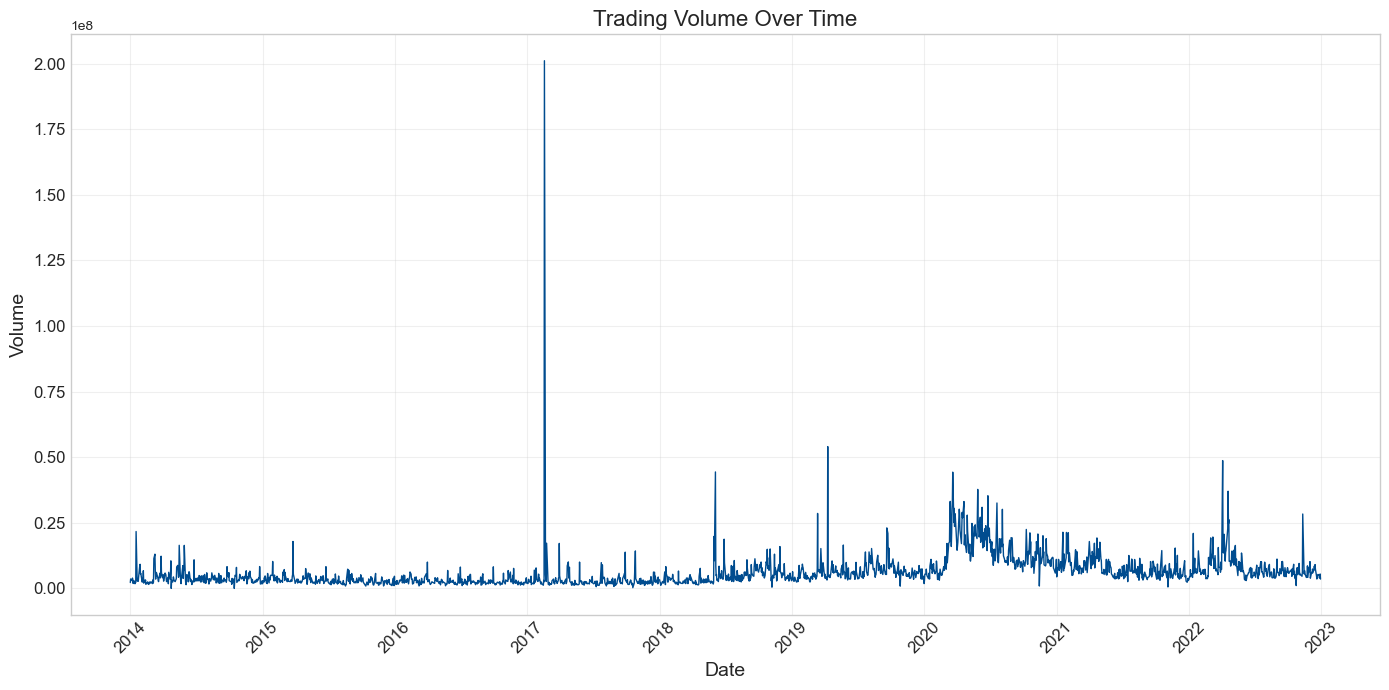

New return calculation stats:
Return range: -12.606901190575638 to 11.599582495728434
Number of non-NaN returns: 2219
First 5 return values: Date
2014-01-01         NaN
2014-01-02   -1.225282
2014-01-03    0.928447
2014-01-06   -0.211117
2014-01-07    0.408033
Name: (Close, HDFCBANK.NS), dtype: float64


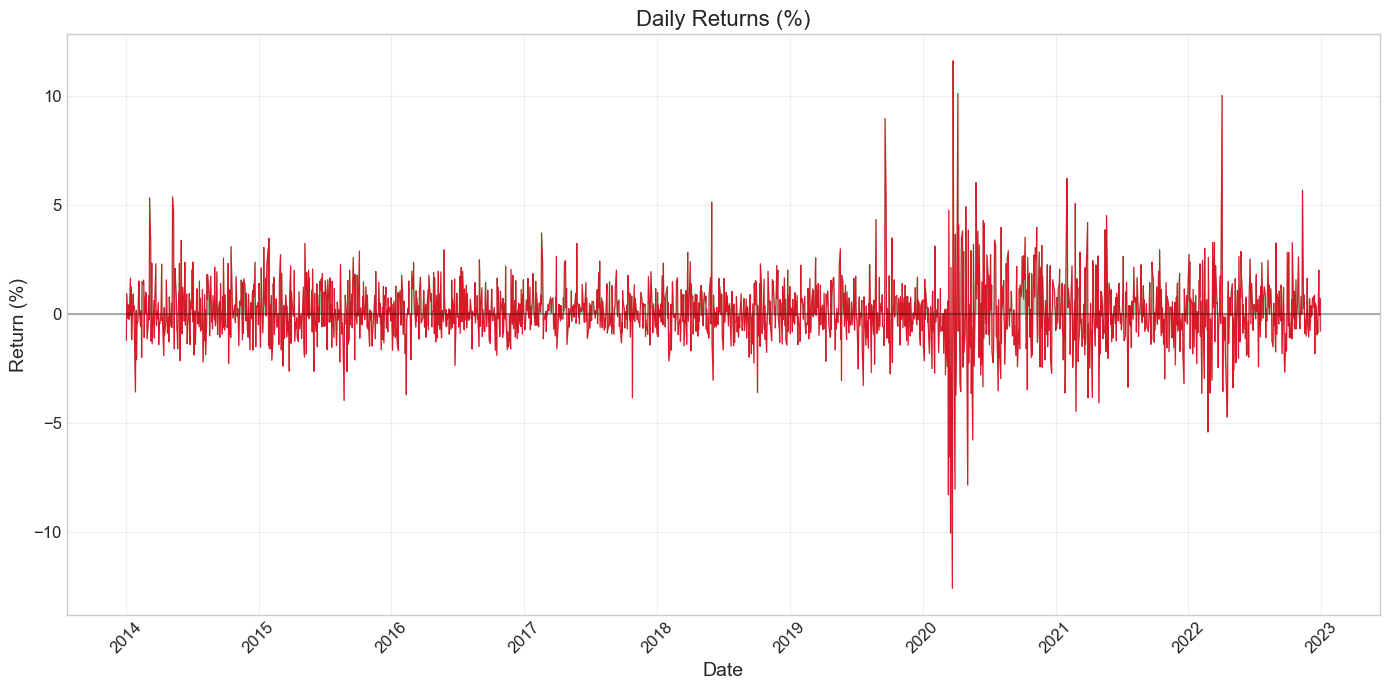

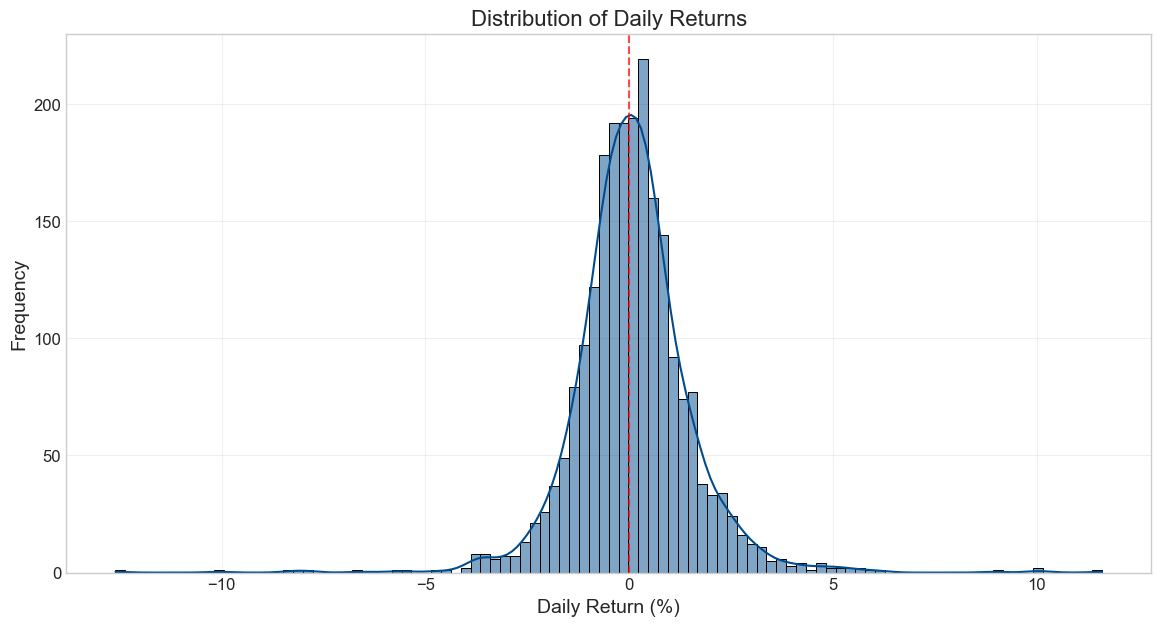

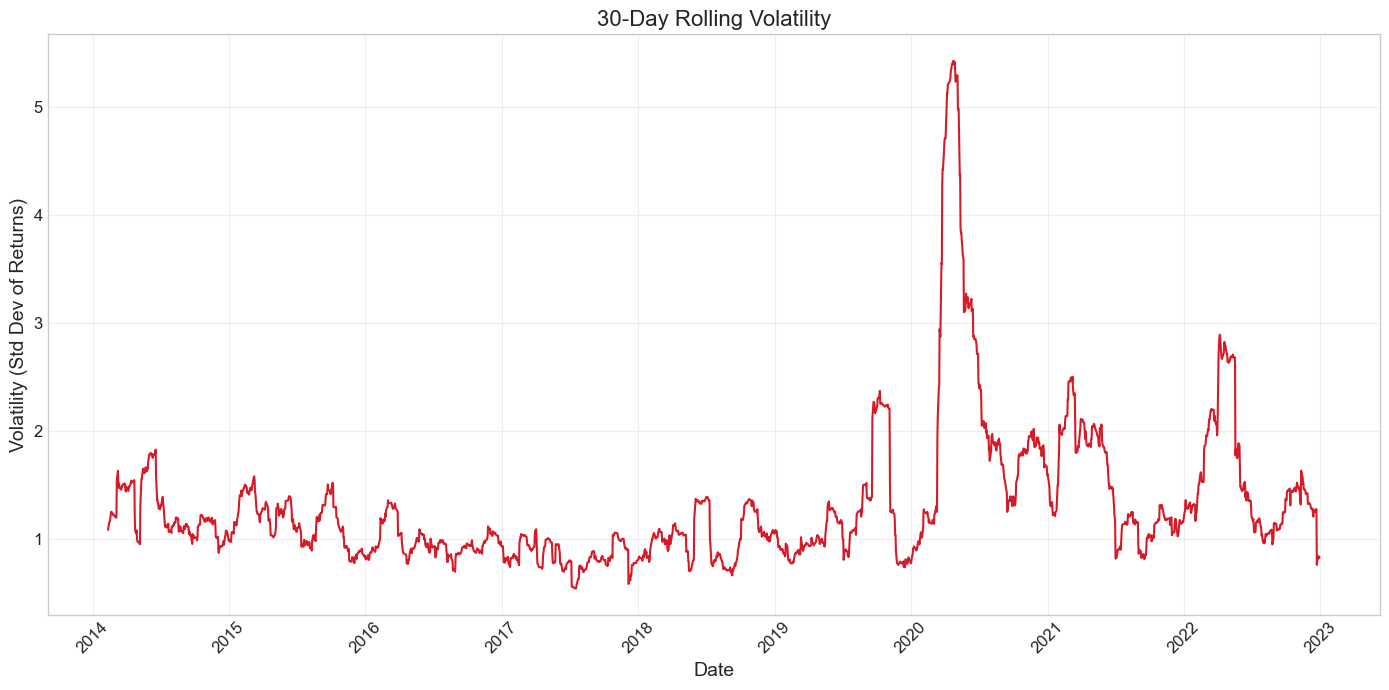

Volatility data check:
First 30 values (expect NaNs at beginning): Date
2014-01-01   NaN
2014-01-02   NaN
2014-01-03   NaN
2014-01-06   NaN
2014-01-07   NaN
2014-01-08   NaN
2014-01-09   NaN
2014-01-10   NaN
2014-01-13   NaN
2014-01-14   NaN
2014-01-15   NaN
2014-01-16   NaN
2014-01-17   NaN
2014-01-20   NaN
2014-01-21   NaN
2014-01-22   NaN
2014-01-23   NaN
2014-01-24   NaN
2014-01-27   NaN
2014-01-28   NaN
2014-01-29   NaN
2014-01-30   NaN
2014-01-31   NaN
2014-02-03   NaN
2014-02-04   NaN
2014-02-05   NaN
2014-02-06   NaN
2014-02-07   NaN
2014-02-10   NaN
2014-02-11   NaN
Name: (Close, HDFCBANK.NS), dtype: float64
Values after 30 days: Date
2014-02-12    1.084854
2014-02-13    1.121678
2014-02-14    1.143307
2014-02-17    1.172910
2014-02-18    1.205810
2014-02-19    1.235517
2014-02-20    1.251481
2014-02-21    1.251943
2014-02-24    1.228828
2014-02-25    1.228737
Name: (Close, HDFCBANK.NS), dtype: float64
Any valid data in volatility series? True
Number of valid values: 2190


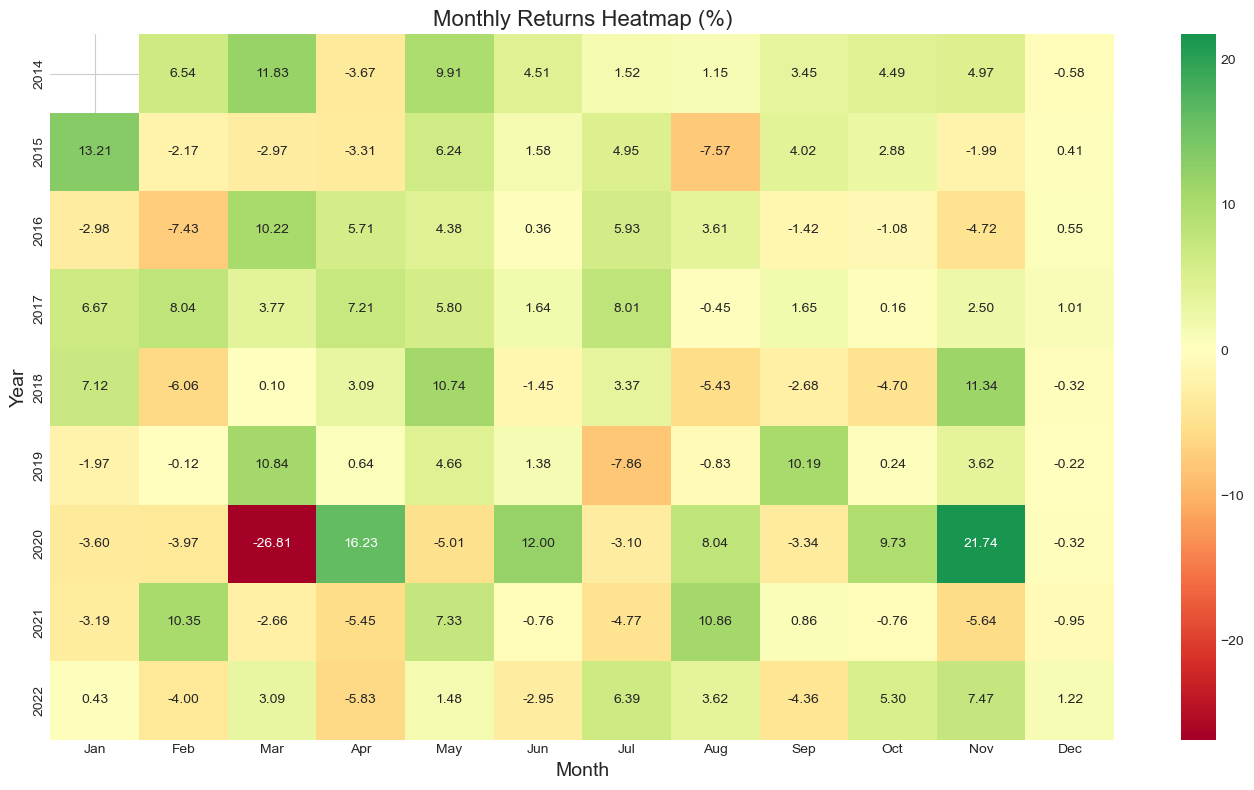

Monthly returns range: Min: -26.81% Max: 21.74%


In [74]:

# 2.1 Time Series Analysis
plt.figure(figsize=(14, 7))
plt.plot(hdfc_data.index, hdfc_data['Close'], color=HDFC_BLUE, linewidth=1.5)
plt.title("HDFC Bank Stock Price (2014-2023)", fontsize=16)
plt.ylabel("Price (INR)", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("hdfc_stock_price.png", dpi=300, bbox_inches='tight')
plt.show() 

# 2.2 Volume Analysis  

# Inspect data structure

print("Data columns:", hdfc_data.columns)
print("Data types:", hdfc_data.dtypes)
print("Shape:", hdfc_data.shape)

# 2.2 Volume Analysis - working with multi-level columns
plt.figure(figsize=(14, 7))
# Access Volume with the correct multi-level indexing
volume_data = hdfc_data[('Volume', 'HDFCBANK.NS')]
plt.plot(hdfc_data.index, volume_data, color=HDFC_BLUE, linewidth=1)
plt.title("Trading Volume Over Time", fontsize=16)
plt.ylabel("Volume", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("hdfc_volume.png", dpi=300, bbox_inches='tight')
plt.show()

# 2.3 Daily Returns Analysis - calculating from scratch 

plt.figure(figsize=(14, 7))

# Calculate returns directly from Close price
returns = hdfc_data[('Close', 'HDFCBANK.NS')].pct_change() * 100
print("New return calculation stats:")
print("Return range:", returns.min(), "to", returns.max())
print("Number of non-NaN returns:", returns.count())
print("First 5 return values:", returns.head())

# Check if we now have valid data
if returns.count() > 0:
    # Plot with valid data
    plt.plot(hdfc_data.index[1:], returns.iloc[1:], color=HDFC_RED, linewidth=0.8)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Simple fill between for visualization
    plt.fill_between(hdfc_data.index[1:], returns.iloc[1:], 0, 
                    where=(returns.iloc[1:] >= 0), color=HDFC_GREEN, alpha=0.3)
    plt.fill_between(hdfc_data.index[1:], returns.iloc[1:], 0, 
                    where=(returns.iloc[1:] < 0), color=HDFC_RED, alpha=0.3)
    
    plt.title("Daily Returns (%)", fontsize=16)
    plt.ylabel("Return (%)", fontsize=14)
    plt.xlabel("Date", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.savefig("hdfc_daily_returns.png", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("ERROR: Still no valid return data after recalculation")              

# 2.4 Return Distribution Analysis

plt.figure(figsize=(14, 7))

# Calculate returns if needed
returns = hdfc_data[('Close', 'HDFCBANK.NS')].pct_change() * 100
returns = returns.dropna()  # Remove NaN values

# Create histogram with KDE
sns.histplot(returns, bins=100, kde=True, color=HDFC_BLUE)
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7)
plt.title("Distribution of Daily Returns", fontsize=16)
plt.xlabel("Daily Return (%)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("hdfc_return_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# 2.5 Volatility Analysis (Rolling Standard Deviation)

plt.figure(figsize=(14, 7))

# Calculate returns and volatility
returns = hdfc_data[('Close', 'HDFCBANK.NS')].pct_change() * 100
volatility_30d = returns.rolling(window=30).std()

# Store for later use if needed
hdfc_data[('Volatility_30d', '')] = volatility_30d

# Plot volatility
plt.plot(hdfc_data.index, volatility_30d, color=HDFC_RED, linewidth=1.5)
plt.title("30-Day Rolling Volatility", fontsize=16)
plt.ylabel("Volatility (Std Dev of Returns)", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("hdfc_volatility.png", dpi=300, bbox_inches='tight')
plt.show()

# 2.6 Monthly Returns Heatmap (Years vs Months) 

# Debug volatility data
print("Volatility data check:")
print("First 30 values (expect NaNs at beginning):", volatility_30d.head(30))
print("Values after 30 days:", volatility_30d.iloc[30:40])
print("Any valid data in volatility series?", volatility_30d.notna().any())
print("Number of valid values:", volatility_30d.notna().sum())  


plt.figure(figsize=(14, 8))

# Calculate monthly returns from daily close prices
close_prices = hdfc_data[('Close', 'HDFCBANK.NS')]
monthly_returns = close_prices.resample('M').last().pct_change() * 100

# Create a DataFrame for the monthly returns
monthly_df = pd.DataFrame({'returns': monthly_returns})

# Add year and month columns
monthly_df['year'] = monthly_df.index.year
monthly_df['month'] = monthly_df.index.month

# Create pivot table
pivot_table = monthly_df.pivot(index='year', columns='month', values='returns')

# Plot heatmap with proper formatting
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', center=0, fmt='.2f')
plt.title("Monthly Returns Heatmap (%)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Year", fontsize=14)

# Label the months with names instead of numbers
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + 0.5, month_labels)

plt.tight_layout()
plt.savefig("hdfc_monthly_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

print("Monthly returns range:", 
      f"Min: {pivot_table.min().min():.2f}%", 
      f"Max: {pivot_table.max().max():.2f}%")

# SECTION 3: FEATURE ENGINEERING




In [27]:
# SECTION 3: FEATURE ENGINEERING 

print("\nCreating technical features for analysis...")

# 3.1 Create price-based features
hdfc_data['H-L'] = hdfc_data['High'] - hdfc_data['Low']  # Daily range
hdfc_data['O-C'] = hdfc_data['Close'] - hdfc_data['Open']  # Daily price change
hdfc_data['5day_return'] = hdfc_data['Close'].pct_change(5) * 100  # 5-day return
hdfc_data['21day_return'] = hdfc_data['Close'].pct_change(21) * 100  # 21-day (monthly) return

# 3.2 Create moving averages
hdfc_data['3day_MA'] = hdfc_data['Close'].rolling(window=3).mean()
hdfc_data['10day_MA'] = hdfc_data['Close'].rolling(window=10).mean()
hdfc_data['30day_MA'] = hdfc_data['Close'].rolling(window=30).mean()
hdfc_data['60day_MA'] = hdfc_data['Close'].rolling(window=60).mean()

# 3.3 Create volatility features
hdfc_data['Daily_Return'] = hdfc_data['Close'].pct_change() * 100
hdfc_data['5day_vol'] = hdfc_data['Daily_Return'].rolling(5).std()
hdfc_data['21day_vol'] = hdfc_data['Daily_Return'].rolling(21).std()

# 3.4 Create momentum indicators
# RSI (Relative Strength Index)
delta = hdfc_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
hdfc_data['RSI'] = 100 - (100 / (1 + rs))

# MACD (Moving Average Convergence Divergence)
hdfc_data['EMA12'] = hdfc_data['Close'].ewm(span=12, adjust=False).mean()
hdfc_data['EMA26'] = hdfc_data['Close'].ewm(span=26, adjust=False).mean()
hdfc_data['MACD'] = hdfc_data['EMA12'] - hdfc_data['EMA26']
hdfc_data['MACD_signal'] = hdfc_data['MACD'].ewm(span=9, adjust=False).mean()
hdfc_data['MACD_hist'] = hdfc_data['MACD'] - hdfc_data['MACD_signal']

# 3.5 Create Bollinger Bands - SIMPLIFIED VERSION
hdfc_data['Bollinger_MA'] = hdfc_data['Close'].rolling(20).mean()
hdfc_data['Bollinger_std'] = hdfc_data['Close'].rolling(20).std()
hdfc_data['Bollinger_Upper'] = hdfc_data['Bollinger_MA'] + (2 * hdfc_data['Bollinger_std'])
hdfc_data['Bollinger_Lower'] = hdfc_data['Bollinger_MA'] - (2 * hdfc_data['Bollinger_std'])

# Calculate %B manually with a for loop to avoid DataFrame issues
b_percent = []
for i in range(len(hdfc_data)):
    close = hdfc_data['Close'].iloc[i]
    upper = hdfc_data['Bollinger_Upper'].iloc[i]
    lower = hdfc_data['Bollinger_Lower'].iloc[i]
    
    # Handle potential division by zero
    if pd.isna(upper) or pd.isna(lower) or upper == lower:
        b_percent.append(0.5)
    else:
        value = (close - lower) / (upper - lower)
        b_percent.append(value)

hdfc_data['Bollinger_%B'] = b_percent

# 3.6 Create target: price rise (1) or fall (0) - multiple timeframes
hdfc_data['Price_Rise_1d'] = np.where(hdfc_data['Close'].shift(-1) > hdfc_data['Close'], 1, 0)
hdfc_data['Price_Rise_3d'] = np.where(hdfc_data['Close'].shift(-3) > hdfc_data['Close'], 1, 0)
hdfc_data['Price_Rise_5d'] = np.where(hdfc_data['Close'].shift(-5) > hdfc_data['Close'], 1, 0)

# Select our main target
hdfc_data['Price_Rise'] = hdfc_data['Price_Rise_1d']

# 3.7 Handle missing values - FIXED APPROACH
# Skip first 60 rows due to indicator windows (longest window used is 60)
hdfc_data = hdfc_data.iloc[60:].copy()

# Fill remaining missing values
hdfc_data.fillna(method='ffill', inplace=True)
hdfc_data.fillna(method='bfill', inplace=True)

print(f"Dataset after feature engineering: {hdfc_data.shape[0]} rows, {hdfc_data.shape[1]} columns")
print(f"Target distribution: {hdfc_data['Price_Rise'].value_counts(normalize=True).to_dict()}")


Creating technical features for analysis...
Dataset after feature engineering: 2100 rows, 31 columns
Target distribution: {1: 0.518095238095238, 0: 0.4819047619047619}


# SECTION 4: FEATURE CORRELATION AND SELECTION 
   

Creating features directly...
Handling missing values...
Final dataset shape: (2040, 22)
NaN check: 0


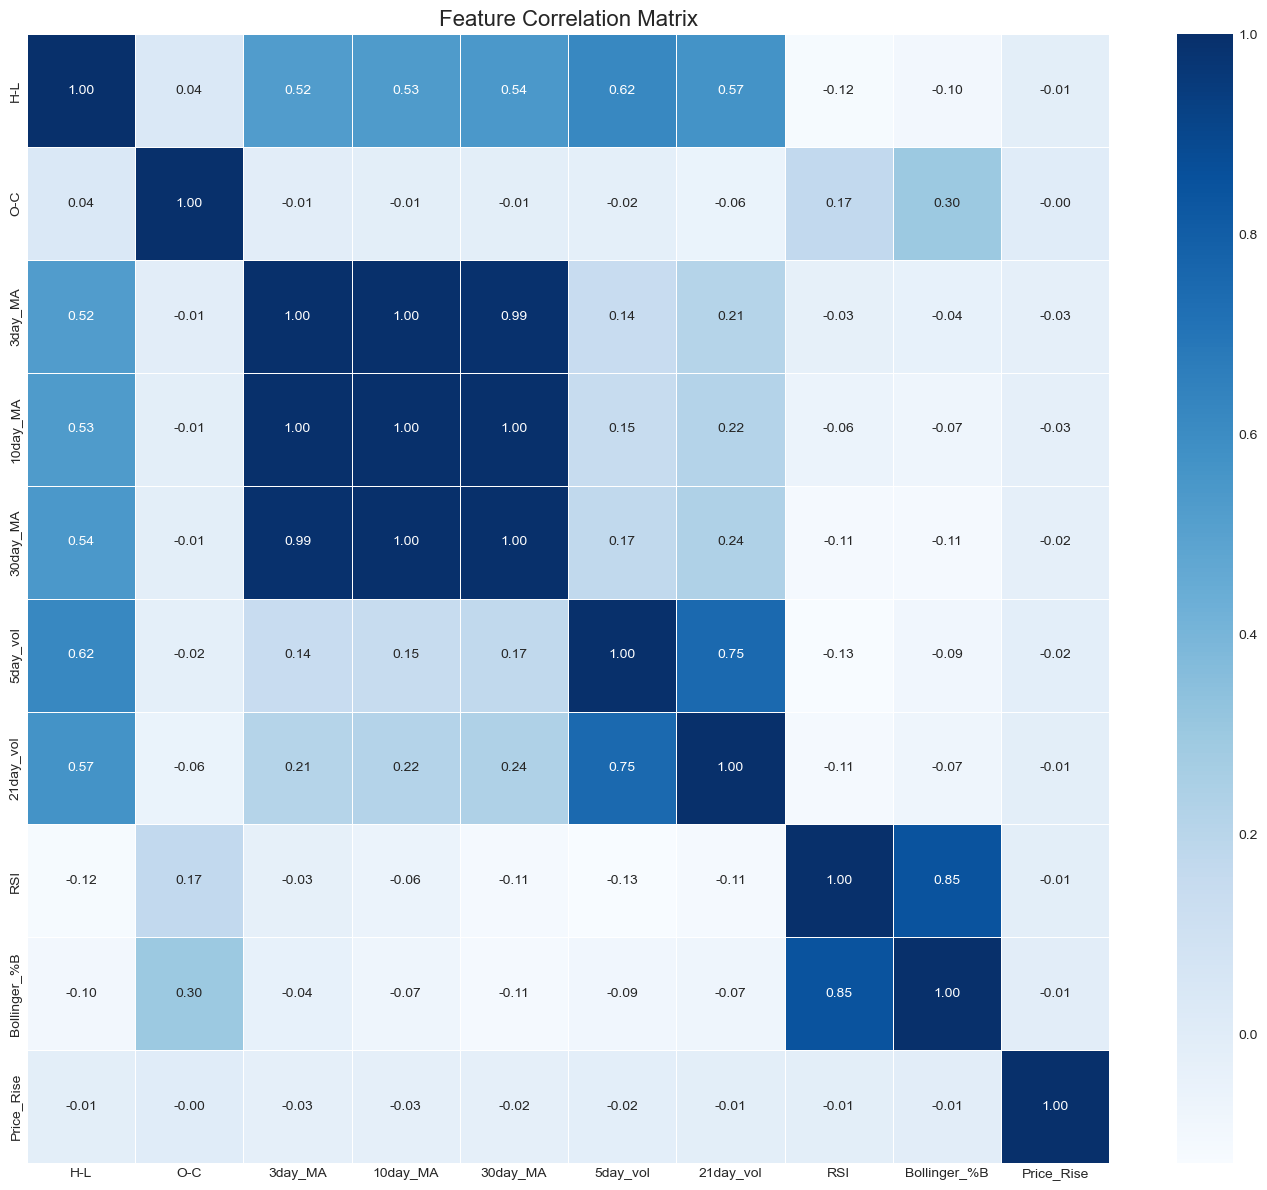

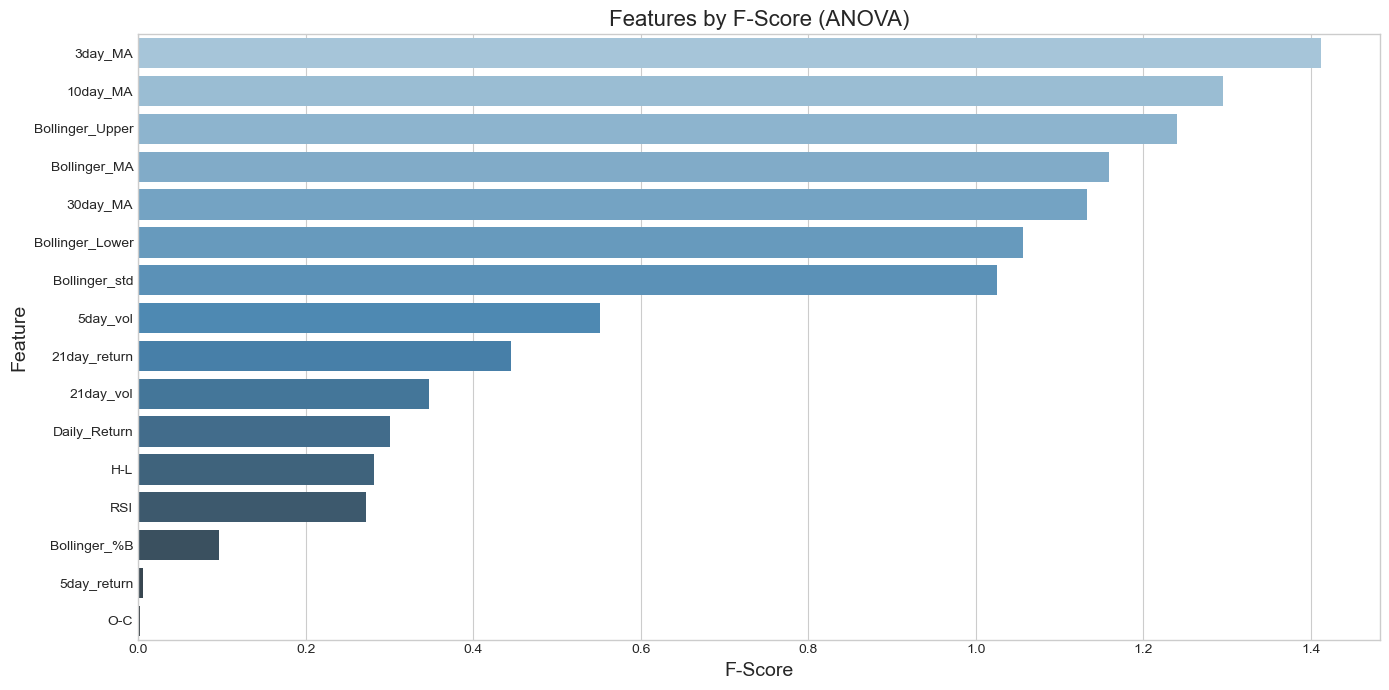


Features ranked by importance:
            Feature   F_Score   P_Value
4           3day_MA  1.411877  0.234884
5          10day_MA  1.294755  0.255307
13  Bollinger_Upper  1.240004  0.265602
11     Bollinger_MA  1.159471  0.281703
6          30day_MA  1.133069  0.287248
14  Bollinger_Lower  1.056035  0.304243
12    Bollinger_std  1.024945  0.311469
8          5day_vol  0.551867  0.457641
3      21day_return  0.445473  0.504568
9         21day_vol  0.346903  0.555937
7      Daily_Return  0.300330  0.583736
0               H-L  0.281946  0.595487
10              RSI  0.272410  0.601777
15     Bollinger_%B  0.096102  0.756590
2       5day_return  0.005388  0.941494
1               O-C  0.002353  0.961314

Selected features for modeling:
['3day_MA', '10day_MA', 'Bollinger_Upper', 'Bollinger_MA', '30day_MA', 'Bollinger_Lower', 'Bollinger_std', '5day_vol', '21day_return', '21day_vol']


In [38]:
# SECTION 4: FEATURE CORRELATION AND SELECTION - REVISED

# First, extract the basic price data we need
close_prices = hdfc_data[('Close', 'HDFCBANK.NS')]
high_prices = hdfc_data[('High', 'HDFCBANK.NS')]
low_prices = hdfc_data[('Low', 'HDFCBANK.NS')]
open_prices = hdfc_data[('Open', 'HDFCBANK.NS')]
volume = hdfc_data[('Volume', 'HDFCBANK.NS')]
price_rise = hdfc_data[('Price_Rise', '')]

# Create a new DataFrame with the basic data
ml_data = pd.DataFrame({
    'Close': close_prices,
    'High': high_prices,
    'Low': low_prices,
    'Open': open_prices,
    'Volume': volume,
    'Price_Rise': price_rise
})

# Re-engineer features
print("Creating features directly...")
# Price-based features
ml_data['H-L'] = ml_data['High'] - ml_data['Low']
ml_data['O-C'] = ml_data['Close'] - ml_data['Open']
ml_data['5day_return'] = ml_data['Close'].pct_change(5) * 100
ml_data['21day_return'] = ml_data['Close'].pct_change(21) * 100

# Moving averages
ml_data['3day_MA'] = ml_data['Close'].rolling(window=3).mean()
ml_data['10day_MA'] = ml_data['Close'].rolling(window=10).mean()
ml_data['30day_MA'] = ml_data['Close'].rolling(window=30).mean()

# Volatility
ml_data['Daily_Return'] = ml_data['Close'].pct_change() * 100
ml_data['5day_vol'] = ml_data['Daily_Return'].rolling(5).std()
ml_data['21day_vol'] = ml_data['Daily_Return'].rolling(21).std()

# RSI
delta = ml_data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
ml_data['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
ml_data['Bollinger_MA'] = ml_data['Close'].rolling(20).mean()
ml_data['Bollinger_std'] = ml_data['Close'].rolling(20).std()
ml_data['Bollinger_Upper'] = ml_data['Bollinger_MA'] + (2 * ml_data['Bollinger_std'])
ml_data['Bollinger_Lower'] = ml_data['Bollinger_MA'] - (2 * ml_data['Bollinger_std'])

# Avoid division issues
numerator = ml_data['Close'] - ml_data['Bollinger_Lower']
denominator = ml_data['Bollinger_Upper'] - ml_data['Bollinger_Lower']
ml_data['Bollinger_%B'] = numerator / denominator
ml_data['Bollinger_%B'] = ml_data['Bollinger_%B'].replace([np.inf, -np.inf], np.nan)

# Fill in missing values
print("Handling missing values...")
# Skip first 60 rows due to rolling window calculations
ml_data = ml_data.iloc[60:].copy()
ml_data.fillna(ml_data.mean(), inplace=True)

print("Final dataset shape:", ml_data.shape)
print("NaN check:", ml_data.isna().sum().sum())

# Create correlation heatmap
plt.figure(figsize=(14, 12))
features_to_plot = ['H-L', 'O-C', '3day_MA', '10day_MA', '30day_MA', 
                   '5day_vol', '21day_vol', 'RSI', 'Bollinger_%B', 'Price_Rise']
                   
correlation = ml_data[features_to_plot].corr()
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title("Feature Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.savefig("hdfc_correlation_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# Prepare data for feature selection
exclude_cols = ['Close', 'High', 'Low', 'Open', 'Volume', 'Price_Rise']
feature_cols = [col for col in ml_data.columns if col not in exclude_cols]

# Create X and y for feature selection
X = ml_data[feature_cols]
y = ml_data['Price_Rise']

# Perform feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# Create feature importance DataFrame
feature_scores = pd.DataFrame({
    'Feature': feature_cols,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
})
feature_scores = feature_scores.sort_values('F_Score', ascending=False)

# Plot feature importance
plt.figure(figsize=(14, 7))
sns.barplot(x='F_Score', y='Feature', data=feature_scores, palette='Blues_d')
plt.title("Features by F-Score (ANOVA)", fontsize=16)
plt.xlabel("F-Score", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.savefig("hdfc_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

print("\nFeatures ranked by importance:")
print(feature_scores)

# Select top features for modeling
top_features = feature_scores.nlargest(10, 'F_Score')['Feature'].tolist()
print("\nSelected features for modeling:")
print(top_features)

  # SECTION 5: PREPARE ML DATA
    
    


Training set: 1632 samples
Testing set: 408 samples
Class distribution - Training: [782 850]
Class distribution - Testing: [199 209]

Class imbalance detected: 782 vs 850
Class 0 percentage: 47.92%
Class 1 percentage: 52.08%


<Figure size 1400x1000 with 0 Axes>

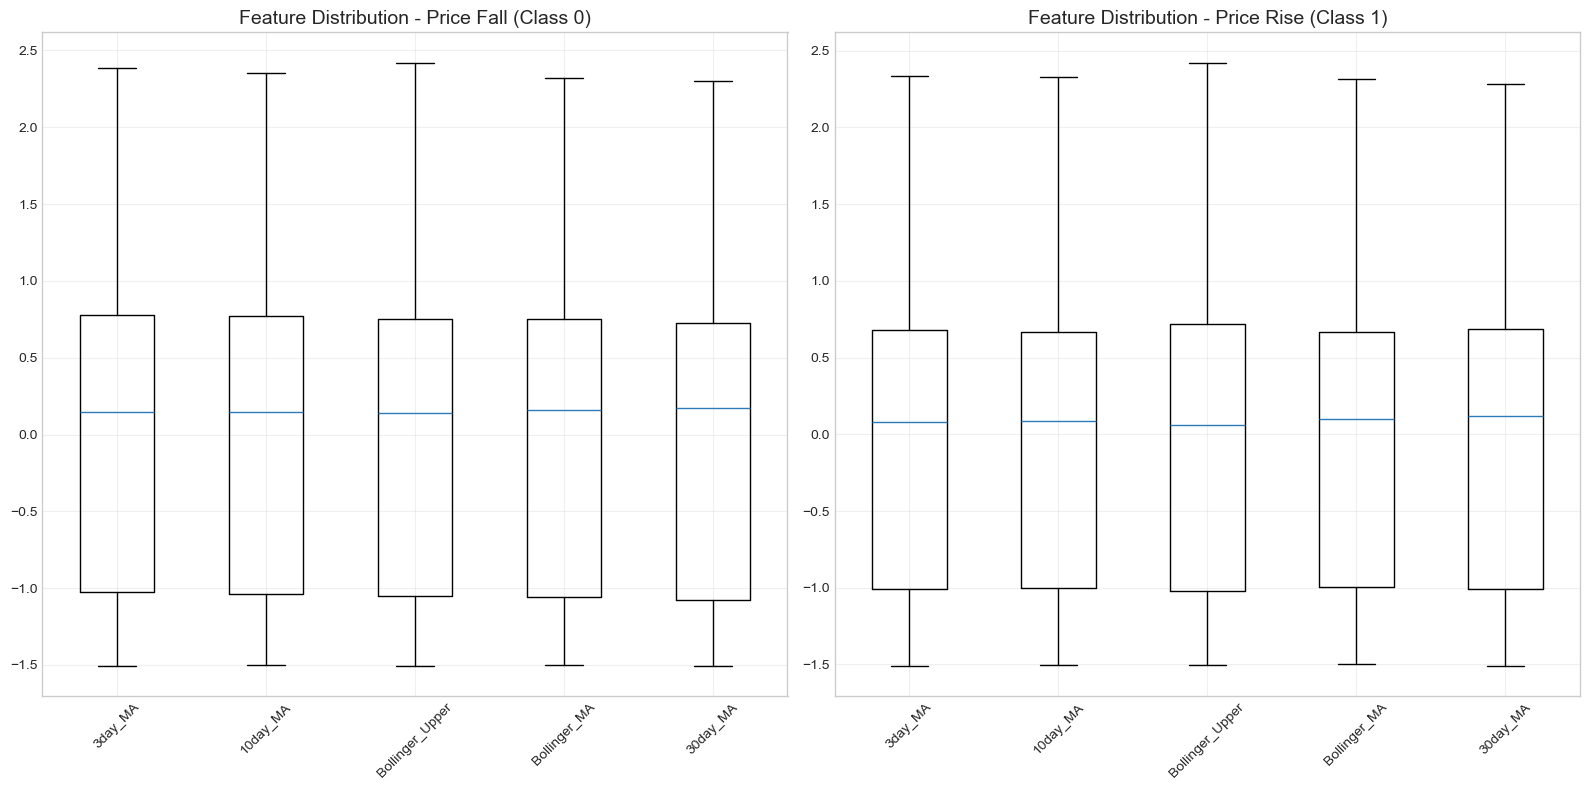

<Figure size 1200x1000 with 0 Axes>

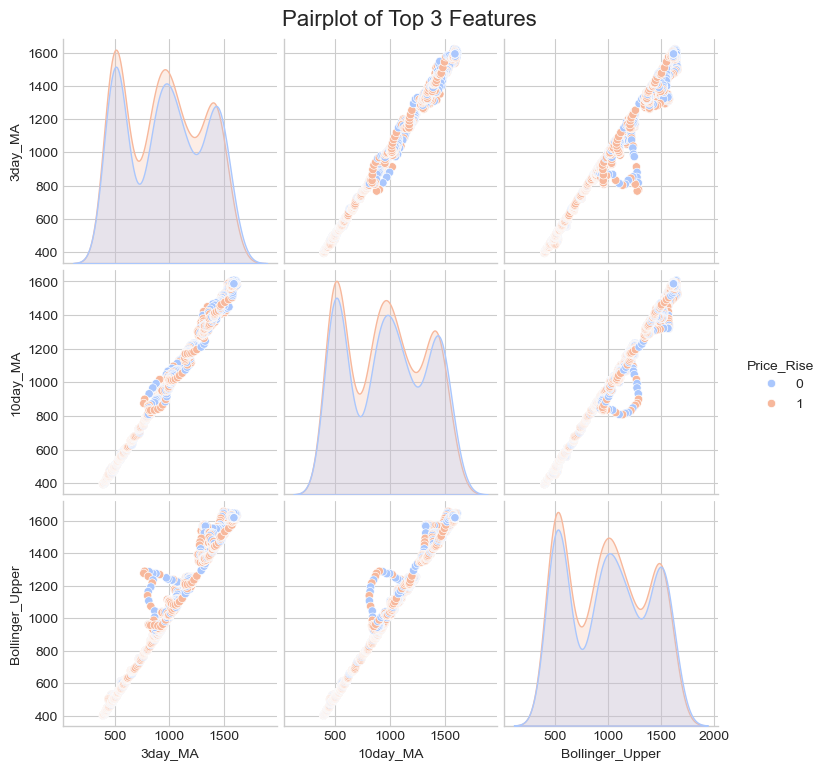


Data preparation complete. Ready for modeling in Section 6 & 7.


In [41]:
# SECTION 5: 

# Create feature set based on analysis and selection
X = ml_data[top_features]
y = ml_data['Price_Rise']

# Split data with proper time-based validation
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Class distribution - Training: {np.bincount(y_train)}")
print(f"Class distribution - Testing: {np.bincount(y_test)}")

# Check for class imbalance
train_class_counts = np.bincount(y_train)
if train_class_counts[0] != train_class_counts[1]:
    print(f"\nClass imbalance detected: {train_class_counts[0]} vs {train_class_counts[1]}")
    print(f"Class 0 percentage: {train_class_counts[0] / len(y_train):.2%}")
    print(f"Class 1 percentage: {train_class_counts[1] / len(y_train):.2%}")
else:
    print("\nClasses are perfectly balanced!")

# Visualize the scaled training data
plt.figure(figsize=(14, 10))
scaled_df = pd.DataFrame(X_train_scaled, columns=top_features)
scaled_df['Price_Rise'] = y_train.values

# Box plot of scaled features by target class
plt.figure(figsize=(16, 8))
feature_to_plot = min(5, len(top_features))  # Plot top 5 features at most
plt.subplot(1, 2, 1)
class0_data = scaled_df[scaled_df['Price_Rise'] == 0][top_features[:feature_to_plot]]
plt.boxplot(class0_data)
plt.title("Feature Distribution - Price Fall (Class 0)", fontsize=14)
plt.xticks(range(1, feature_to_plot+1), top_features[:feature_to_plot], rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
class1_data = scaled_df[scaled_df['Price_Rise'] == 1][top_features[:feature_to_plot]]
plt.boxplot(class1_data)
plt.title("Feature Distribution - Price Rise (Class 1)", fontsize=14)
plt.xticks(range(1, feature_to_plot+1), top_features[:feature_to_plot], rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("hdfc_feature_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

# Create a pairplot of top 3 features to visualize relationships
if len(top_features) >= 3:
    plt.figure(figsize=(12, 10))
    sns.pairplot(ml_data[top_features[:3] + ['Price_Rise']], hue='Price_Rise', palette='coolwarm')
    plt.suptitle("Pairplot of Top 3 Features", y=1.02, fontsize=16)
    plt.savefig("hdfc_feature_pairplot.png", dpi=300, bbox_inches='tight')
    plt.show()

print("\nData preparation complete. Ready for modeling in Section 6 & 7.")

 # SECTION 6: MODEL 1 - LOGISTIC REGRESSION WITH HYPERPARAMETER TUNING


========== MODEL 1: LOGISTIC REGRESSION ==========
Performing grid search for Logistic Regression...
Best parameters: {'C': 100, 'class_weight': None, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.5153

Logistic Regression Results:
Accuracy: 0.4657

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.57      0.51       199
           1       0.47      0.37      0.41       209

    accuracy                           0.47       408
   macro avg       0.47      0.47      0.46       408
weighted avg       0.47      0.47      0.46       408


Cross-validation scores:
Individual scores: [0.51987768 0.50152905 0.54601227 0.50613497 0.50306748]
Mean accuracy: 0.5153
Standard deviation: 0.0167


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=No

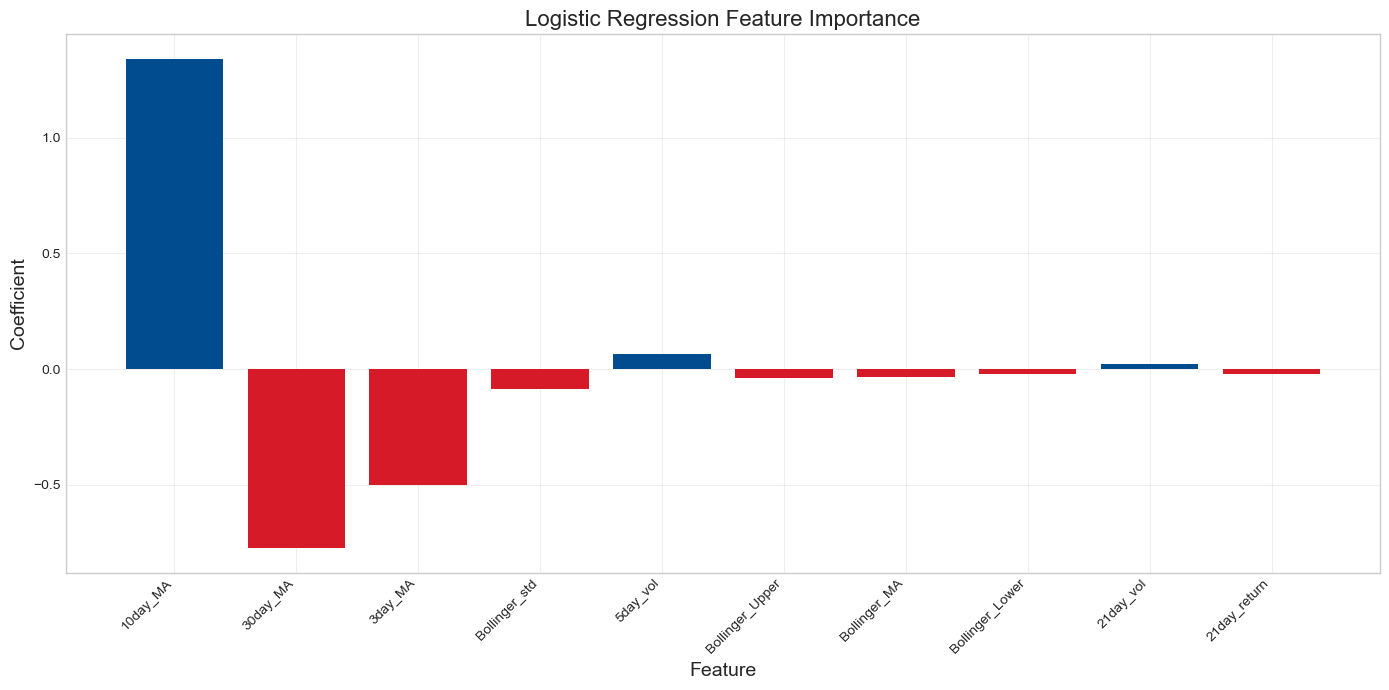

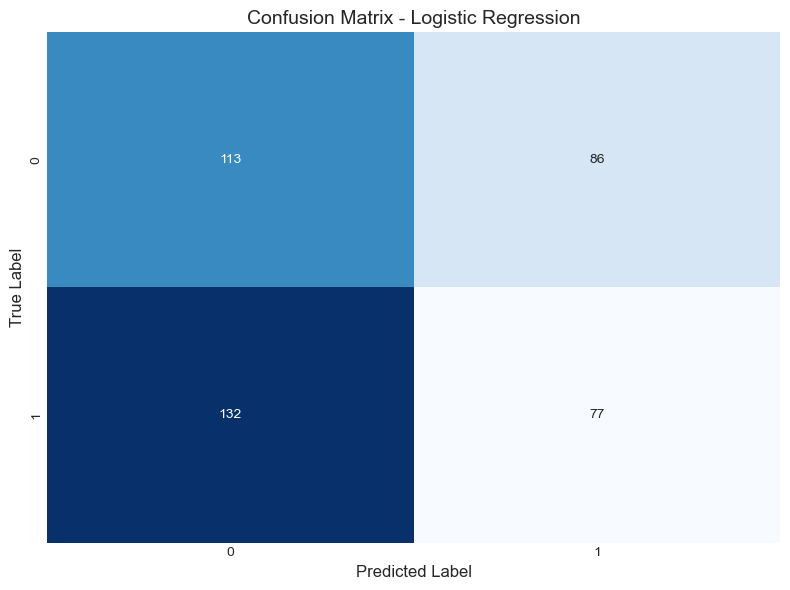

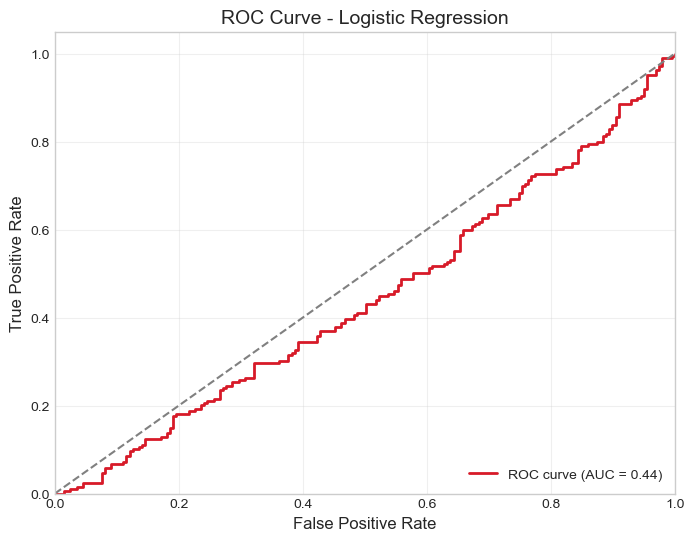

In [50]:
# SECTION 6: 

print("\n========== MODEL 1: LOGISTIC REGRESSION ==========")

# 6.1 Grid search for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'class_weight': [None, 'balanced']
}

# Reduce grid for faster completion (comment this part for full search)
param_grid = {
    'C': [0.01, 1, 100],
    'penalty': ['l2', None],
    'solver': ['lbfgs', 'liblinear'],
    'class_weight': [None, 'balanced']
}

print("Performing grid search for Logistic Regression...")
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# 6.2 Create and train logistic regression with best parameters
lr_model = LogisticRegression(**grid_search.best_params_, max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# 6.3 Make predictions
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_accuracy = accuracy_score(y_test, lr_pred)

# 6.4 Print results
print("\nLogistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

# 6.5 Cross-validation
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:")
print(f"Individual scores: {lr_cv_scores}")
print(f"Mean accuracy: {lr_cv_scores.mean():.4f}")
print(f"Standard deviation: {lr_cv_scores.std():.4f}")

# 6.6 Feature importance for Logistic Regression
lr_importance = pd.DataFrame({
    'Feature': top_features,
    'Coefficient': lr_model.coef_[0]
})
lr_importance['Abs_Coefficient'] = np.abs(lr_importance['Coefficient'])
lr_importance = lr_importance.sort_values('Abs_Coefficient', ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(lr_importance['Feature'], lr_importance['Coefficient'], color=[HDFC_BLUE if x > 0 else HDFC_RED for x in lr_importance['Coefficient']])
plt.title("Logistic Regression Feature Importance", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Coefficient", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("hdfc_lr_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

# 6.7 Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix - Logistic Regression", fontsize=14)
plt.ylabel("True Label", fontsize=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.tight_layout()
plt.savefig("hdfc_lr_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 6.8 ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, lr_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=HDFC_RED, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig("hdfc_lr_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# SECTION 7: MODEL 2 - EXTRA TREES WITH HYPERPARAMETER TUNING


========== MODEL 2: EXTRA TREES ==========
Performing grid search for Extra Trees...
Best parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.5080

Extra Trees Results:
Accuracy: 0.5147

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.81      0.62       199
           1       0.56      0.23      0.33       209

    accuracy                           0.51       408
   macro avg       0.53      0.52      0.48       408
weighted avg       0.53      0.51      0.47       408


Cross-validation scores:
Individual scores: [0.51681957 0.50458716 0.52147239 0.48466258 0.51226994]
Mean accuracy: 0.5080
Standard deviation: 0.0129


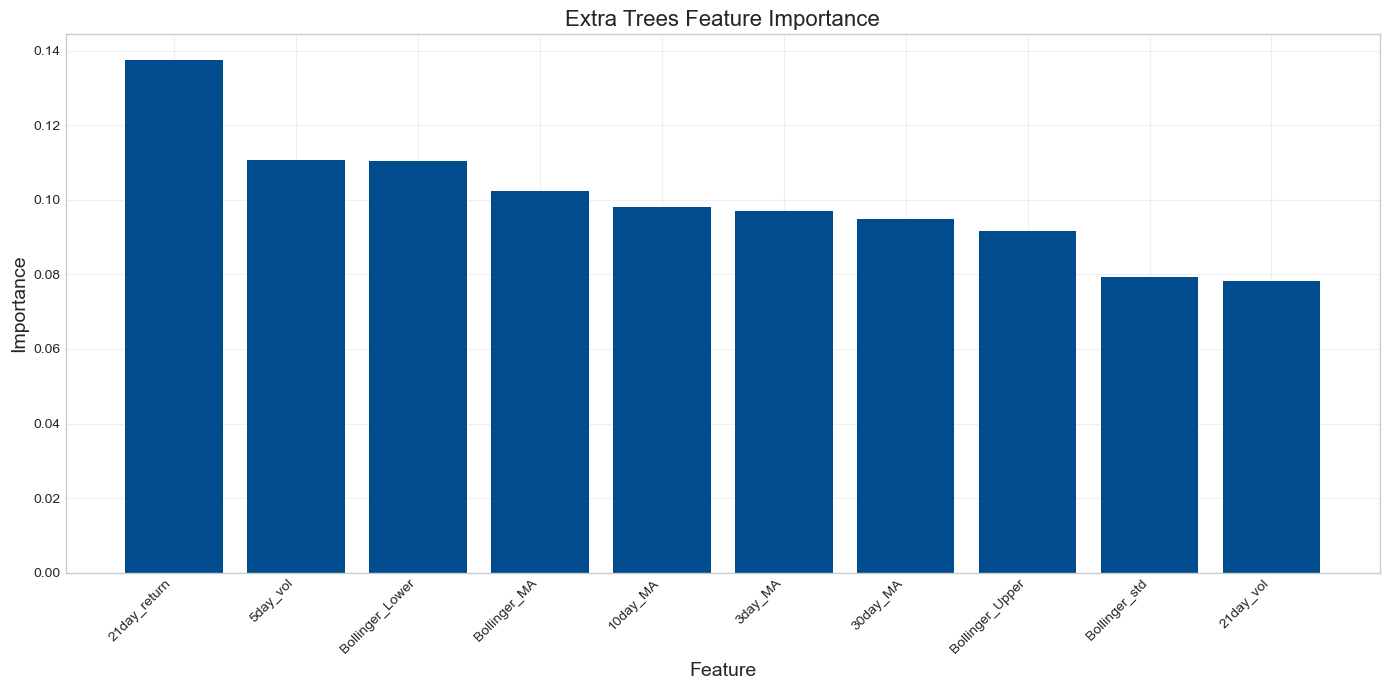

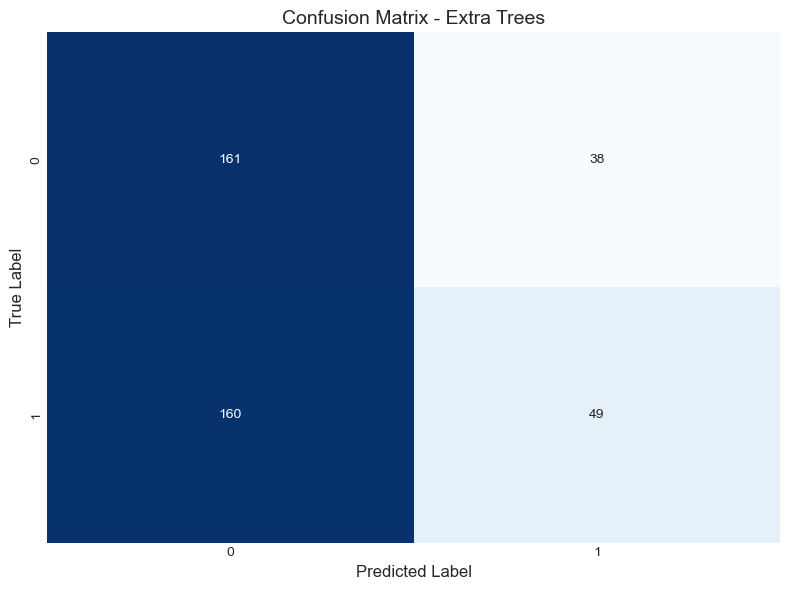

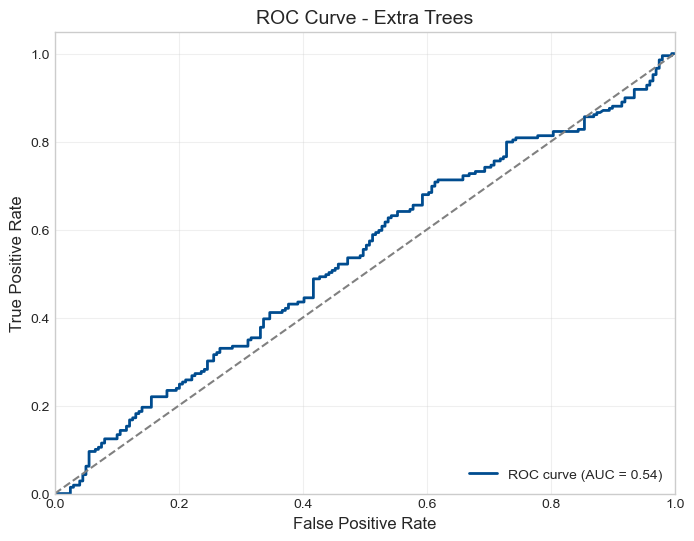

In [53]:


print("\n========== MODEL 2: EXTRA TREES ==========")

# 7.1 Grid search for hyperparameter tuning
et_param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'class_weight': [None, 'balanced']
}

print("Performing grid search for Extra Trees...")
et_grid_search = GridSearchCV(
    ExtraTreesClassifier(random_state=42),
    et_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
et_grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {et_grid_search.best_params_}")
print(f"Best cross-validation score: {et_grid_search.best_score_:.4f}")

# 7.2 Create and train Extra Trees with best parameters
et_model = ExtraTreesClassifier(**et_grid_search.best_params_, random_state=42)
et_model.fit(X_train_scaled, y_train)

# 7.3 Make predictions
et_pred = et_model.predict(X_test_scaled)
et_pred_proba = et_model.predict_proba(X_test_scaled)[:, 1]
et_accuracy = accuracy_score(y_test, et_pred)

# 7.4 Print results
print("\nExtra Trees Results:")
print(f"Accuracy: {et_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, et_pred))

# 7.5 Cross-validation
et_cv_scores = cross_val_score(et_model, X_train_scaled, y_train, cv=5)
print("\nCross-validation scores:")
print(f"Individual scores: {et_cv_scores}")
print(f"Mean accuracy: {et_cv_scores.mean():.4f}")
print(f"Standard deviation: {et_cv_scores.std():.4f}")

# 7.6 Feature importance for Extra Trees
et_importance = pd.DataFrame({
    'Feature': top_features,
    'Importance': et_model.feature_importances_
})
et_importance = et_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(14, 7))
plt.bar(et_importance['Feature'], et_importance['Importance'], color=HDFC_BLUE)
plt.title("Extra Trees Feature Importance", fontsize=16)
plt.xlabel("Feature", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("hdfc_et_feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

# 7.7 Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, et_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix - Extra Trees", fontsize=14)
plt.ylabel("True Label", fontsize=12)
plt.xlabel("Predicted Label", fontsize=12)
plt.tight_layout()
plt.savefig("hdfc_et_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

# 7.8 ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, et_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color=HDFC_BLUE, lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Extra Trees', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.savefig("hdfc_et_roc_curve.png", dpi=300, bbox_inches='tight')
plt.show()

# SECTION 8: MODEL COMPARISON AND EVALUATION 


========== MODEL COMPARISON ==========

Model Performance Comparison:
Logistic Regression:
  - CV Accuracy: 0.5153 ± 0.0167
  - Test Accuracy: 0.4657
Extra Trees:
  - CV Accuracy: 0.5080 ± 0.0129
  - Test Accuracy: 0.5147

Best model based on test accuracy: Extra Trees


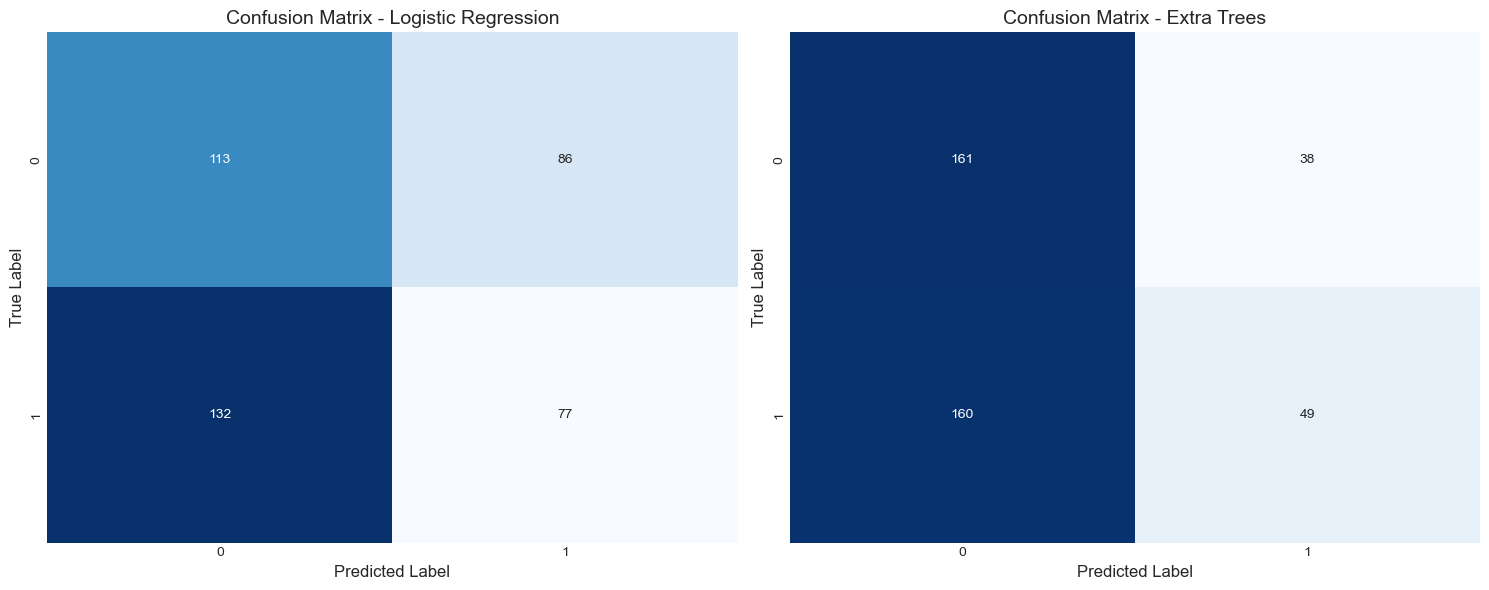

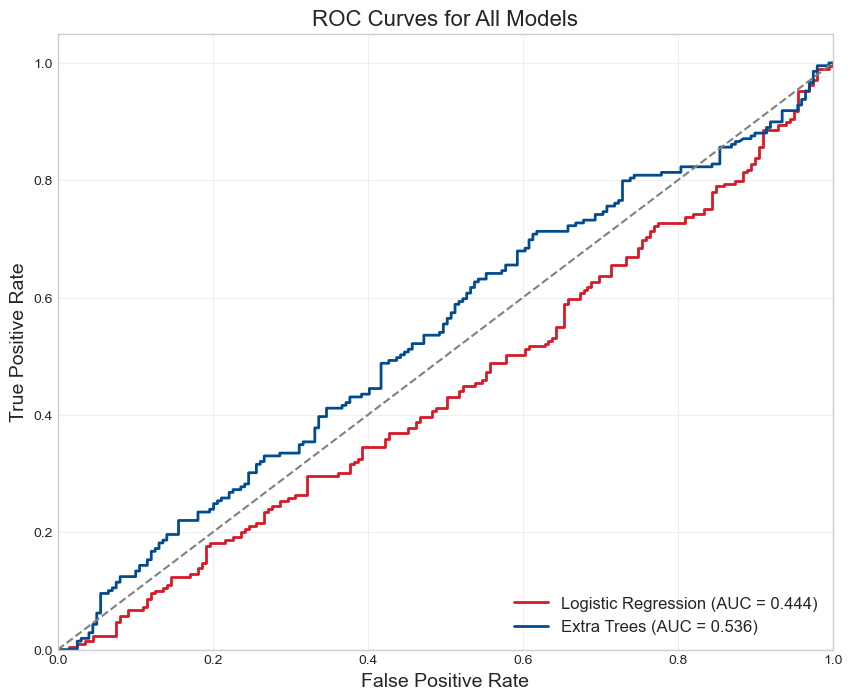

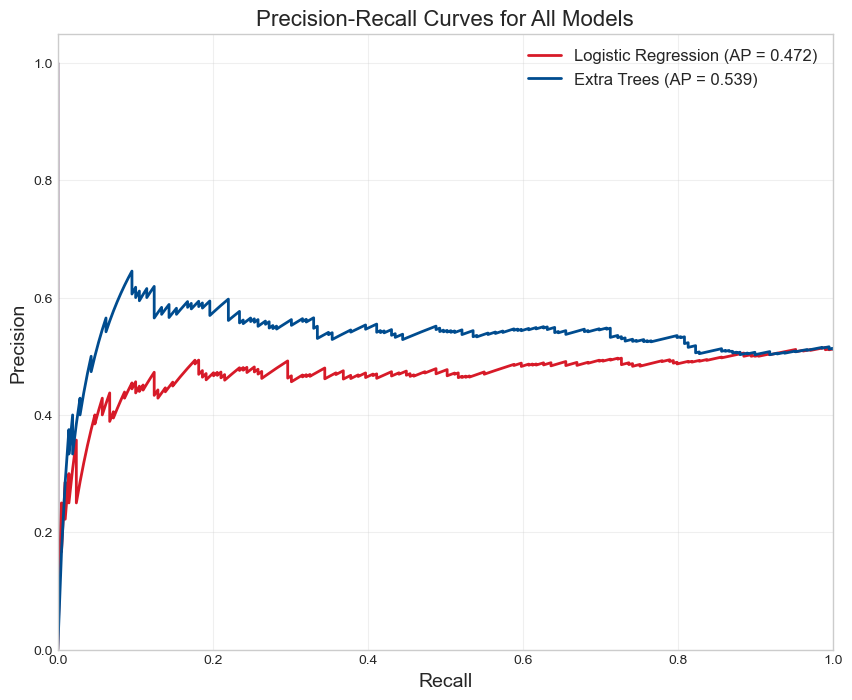

In [56]:

print("\n========== MODEL COMPARISON ==========")

# 8.1 Compare models
models = {
    'Logistic Regression': {
        'model': lr_model,
        'pred': lr_pred,
        'prob': lr_pred_proba,
        'cv_mean': lr_cv_scores.mean(),
        'cv_std': lr_cv_scores.std(),
        'accuracy': lr_accuracy
    },
    'Extra Trees': {
        'model': et_model,
        'pred': et_pred,
        'prob': et_pred_proba,
        'cv_mean': et_cv_scores.mean(),
        'cv_std': et_cv_scores.std(),
        'accuracy': et_accuracy
    }
}

# Find best model based on test accuracy
best_model_name = max(models, key=lambda x: models[x]['accuracy'])
best_model = models[best_model_name]

print("\nModel Performance Comparison:")
for model_name, model_info in models.items():
    print(f"{model_name}:")
    print(f"  - CV Accuracy: {model_info['cv_mean']:.4f} ± {model_info['cv_std']:.4f}")
    print(f"  - Test Accuracy: {model_info['accuracy']:.4f}")

print(f"\nBest model based on test accuracy: {best_model_name}")

# 8.2 Confusion Matrices
plt.figure(figsize=(15, 6))

for i, (model_name, model_info) in enumerate(models.items()):
    plt.subplot(1, 2, i+1)
    cm = confusion_matrix(y_test, model_info['pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {model_name}", fontsize=14)
    plt.ylabel("True Label", fontsize=12)
    plt.xlabel("Predicted Label", fontsize=12)

plt.tight_layout()
plt.savefig("hdfc_confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

# 8.3 ROC Curves
plt.figure(figsize=(10, 8))

for model_name, model_info in models.items():
    fpr, tpr, _ = roc_curve(y_test, model_info['prob'])
    roc_auc = auc(fpr, tpr)
    
    if model_name == 'Logistic Regression':
        plt.plot(fpr, tpr, color=HDFC_RED, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')
    else:
        plt.plot(fpr, tpr, color=HDFC_BLUE, lw=2, label=f'{model_name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for All Models', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig("hdfc_roc_curves.png", dpi=300, bbox_inches='tight')
plt.show()

# 8.4 Precision-Recall Curves
plt.figure(figsize=(10, 8))

for model_name, model_info in models.items():
    precision, recall, _ = precision_recall_curve(y_test, model_info['prob'])
    avg_precision = average_precision_score(y_test, model_info['prob'])
    
    if model_name == 'Logistic Regression':
        plt.plot(recall, precision, color=HDFC_RED, lw=2, label=f'{model_name} (AP = {avg_precision:.3f})')
    else:
        plt.plot(recall, precision, color=HDFC_BLUE, lw=2, label=f'{model_name} (AP = {avg_precision:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves for All Models', fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig("hdfc_precision_recall_curves.png", dpi=300, bbox_inches='tight')
plt.show()

# SECTION 9: TRADING STRATEGY


========== TRADING STRATEGY IMPLEMENTATION ==========
Implementing trading strategy based on Extra Trees

Trading Strategy Performance:
Total Market Return: 0.1928
Total Strategy Return (No SL): 0.0156
Total Strategy Return (With SL): 0.0462
Annualized Market Return: 0.1153
Annualized Strategy Return (With SL): 0.0284
Strategy Sharpe Ratio: -0.2612
Market Maximum Drawdown: 0.2324
Strategy Maximum Drawdown: 0.0199
Win Rate: 0.0098
Number of trades: 407


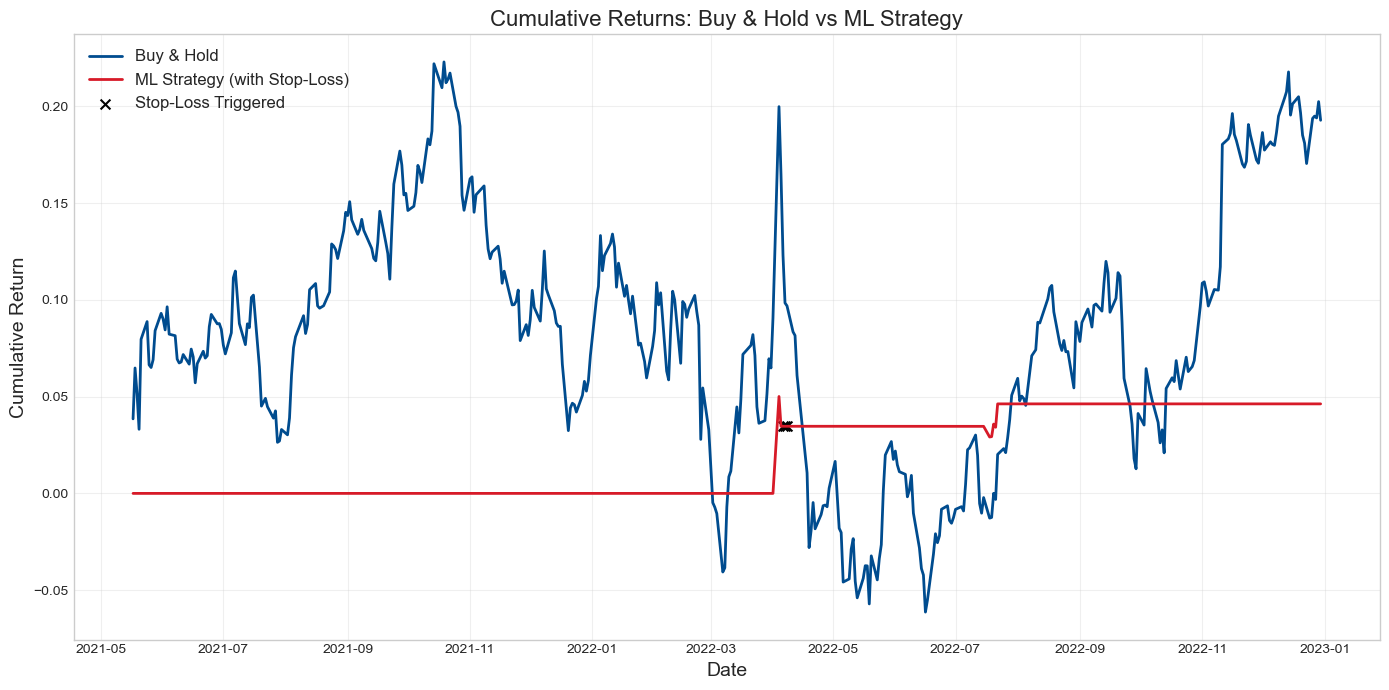

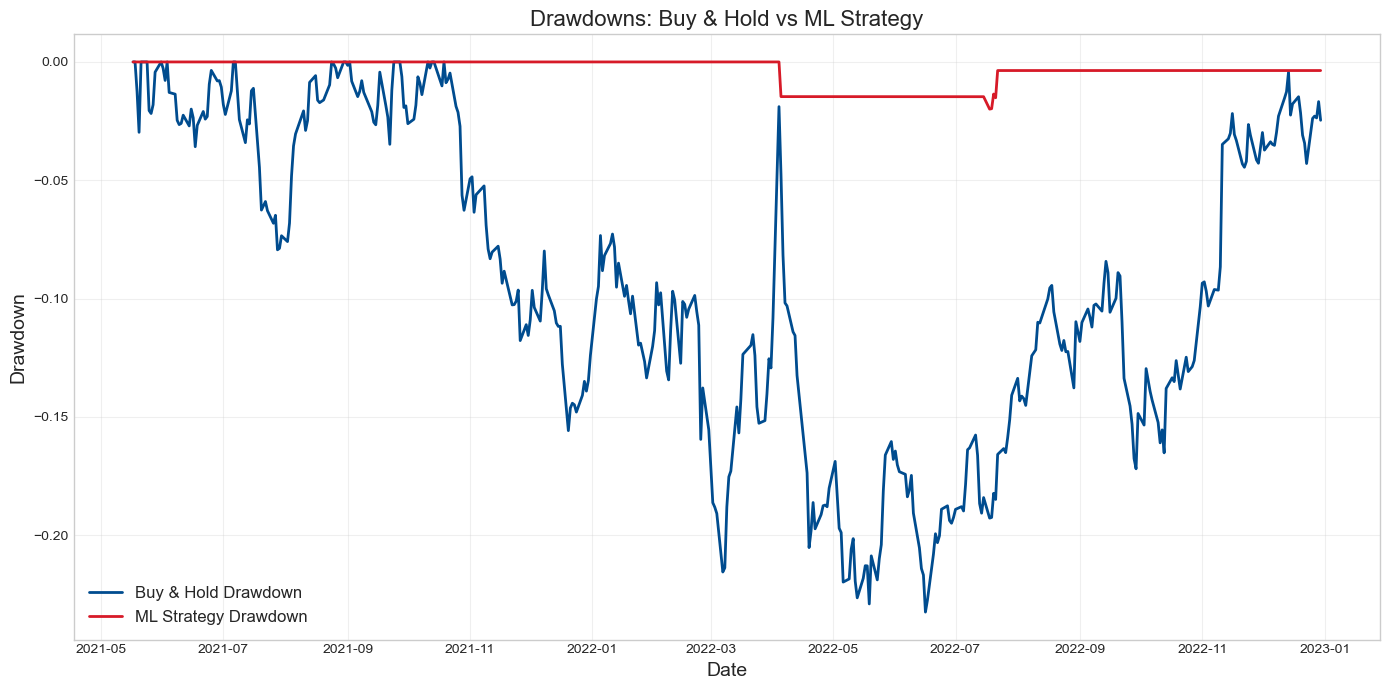

In [69]:

print("\n========== TRADING STRATEGY IMPLEMENTATION ==========")

# Use the best model for trading strategy
selected_model_name = best_model_name
selected_model = models[selected_model_name]['model']
selected_pred = models[selected_model_name]['pred']
selected_prob = models[selected_model_name]['prob']

print(f"Implementing trading strategy based on {selected_model_name}")

# 9.1 Create test data with predictions
test_data = ml_data.iloc[-len(y_test):].copy()
test_data['Predicted_Direction'] = selected_pred
test_data['Prediction_Probability'] = selected_prob

# 9.2 Implement position sizing based on prediction confidence
test_data['Position_Size'] = test_data['Prediction_Probability'].apply(
    lambda x: 1.0 if x > 0.65 else (0.5 if x > 0.55 else 0.0)
)

# 9.3 Calculate returns with position sizing
test_data['Market_Return'] = test_data['Close'].pct_change()
test_data['Strategy_Return'] = test_data['Market_Return'] * test_data['Predicted_Direction'] * test_data['Position_Size']

# 9.4 Implement stop-loss at -1% for risk management
test_data['Stop_Loss_Triggered'] = False

for i in range(1, len(test_data)):
    if test_data['Strategy_Return'].iloc[i-1] < -0.01:  # -1% stop loss
        test_data.loc[test_data.index[i], 'Position_Size'] = 0.0
        test_data.loc[test_data.index[i], 'Stop_Loss_Triggered'] = True

# 9.5 Recalculate strategy returns with stop-loss
test_data['Strategy_Return_With_SL'] = test_data['Market_Return'] * test_data['Predicted_Direction'] * test_data['Position_Size']
test_data.dropna(inplace=True)

# 9.6 Calculate cumulative returns
test_data['Cumulative_Market_Return'] = (1 + test_data['Market_Return']).cumprod() - 1
test_data['Cumulative_Strategy_Return'] = (1 + test_data['Strategy_Return']).cumprod() - 1
test_data['Cumulative_Strategy_Return_With_SL'] = (1 + test_data['Strategy_Return_With_SL']).cumprod() - 1

# 9.7 Calculate performance metrics
# Calculate annualized returns
trading_days_per_year = 252
test_period_years = len(test_data) / trading_days_per_year

market_return = test_data['Cumulative_Market_Return'].iloc[-1]
strategy_return = test_data['Cumulative_Strategy_Return'].iloc[-1]
strategy_sl_return = test_data['Cumulative_Strategy_Return_With_SL'].iloc[-1]

annual_market_return = (1 + market_return) ** (1 / test_period_years) - 1
annual_strategy_return = (1 + strategy_return) ** (1 / test_period_years) - 1
annual_strategy_sl_return = (1 + strategy_sl_return) ** (1 / test_period_years) - 1

# Calculate Sharpe ratio (assuming risk-free rate of 4%)
risk_free_rate = 0.04
sharpe_ratio = np.sqrt(252) * (test_data['Strategy_Return_With_SL'].mean() - (risk_free_rate/252)) / test_data['Strategy_Return_With_SL'].std()

# Calculate maximum drawdown
def calculate_max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    max_dd = 0
    peak = cumulative.iloc[0]
    
    for value in cumulative:
        if value > peak:
            peak = value
        dd = (peak - value) / peak
        if dd > max_dd:
            max_dd = dd
    
    return max_dd

max_drawdown_market = calculate_max_drawdown(test_data['Market_Return'])
max_drawdown_strategy = calculate_max_drawdown(test_data['Strategy_Return_With_SL'])

# Calculate win rate
win_rate = (test_data['Strategy_Return_With_SL'] > 0).mean()

# Print performance metrics
print("\nTrading Strategy Performance:")
print(f"Total Market Return: {market_return:.4f}")
print(f"Total Strategy Return (No SL): {strategy_return:.4f}")
print(f"Total Strategy Return (With SL): {strategy_sl_return:.4f}")
print(f"Annualized Market Return: {annual_market_return:.4f}")
print(f"Annualized Strategy Return (With SL): {annual_strategy_sl_return:.4f}")
print(f"Strategy Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Market Maximum Drawdown: {max_drawdown_market:.4f}")
print(f"Strategy Maximum Drawdown: {max_drawdown_strategy:.4f}")
print(f"Win Rate: {win_rate:.4f}")
print(f"Number of trades: {len(test_data)}")

# 9.8 Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(test_data.index, test_data['Cumulative_Market_Return'], label='Buy & Hold', color=HDFC_BLUE, linewidth=2)
plt.plot(test_data.index, test_data['Cumulative_Strategy_Return_With_SL'], label='ML Strategy (with Stop-Loss)', color=HDFC_RED, linewidth=2)

# Highlight periods where stop-loss was triggered
sl_periods = test_data[test_data['Stop_Loss_Triggered']].index
if len(sl_periods) > 0:
    plt.scatter(sl_periods, test_data.loc[sl_periods, 'Cumulative_Strategy_Return_With_SL'], 
                color='black', s=50, marker='x', label='Stop-Loss Triggered')

plt.title('Cumulative Returns: Buy & Hold vs ML Strategy', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("hdfc_strategy_returns.png", dpi=300, bbox_inches='tight')
plt.show()

# 9.9 Plot drawdowns
def calculate_drawdown_series(returns):
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    return drawdown

market_dd = calculate_drawdown_series(test_data['Market_Return'])
strategy_dd = calculate_drawdown_series(test_data['Strategy_Return_With_SL'])

plt.figure(figsize=(14, 7))
plt.plot(test_data.index, market_dd, label='Buy & Hold Drawdown', color=HDFC_BLUE, linewidth=2)
plt.plot(test_data.index, strategy_dd, label='ML Strategy Drawdown', color=HDFC_RED, linewidth=2)
plt.title('Drawdowns: Buy & Hold vs ML Strategy', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Drawdown', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("hdfc_strategy_drawdowns.png", dpi=300, bbox_inches='tight')
plt.show()

# SECTION 10: ROC CURVE AND MODEL EVALUATION 

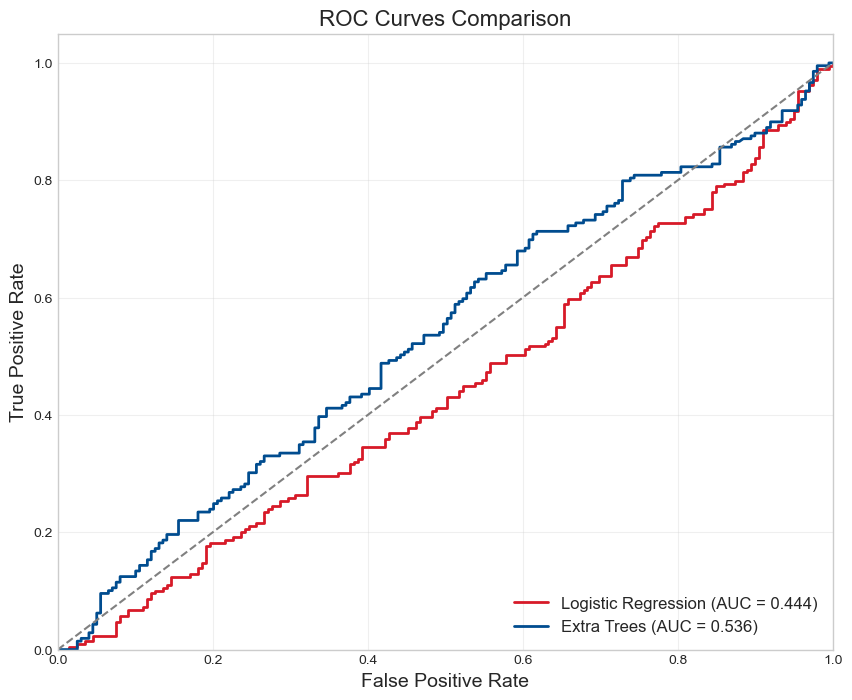

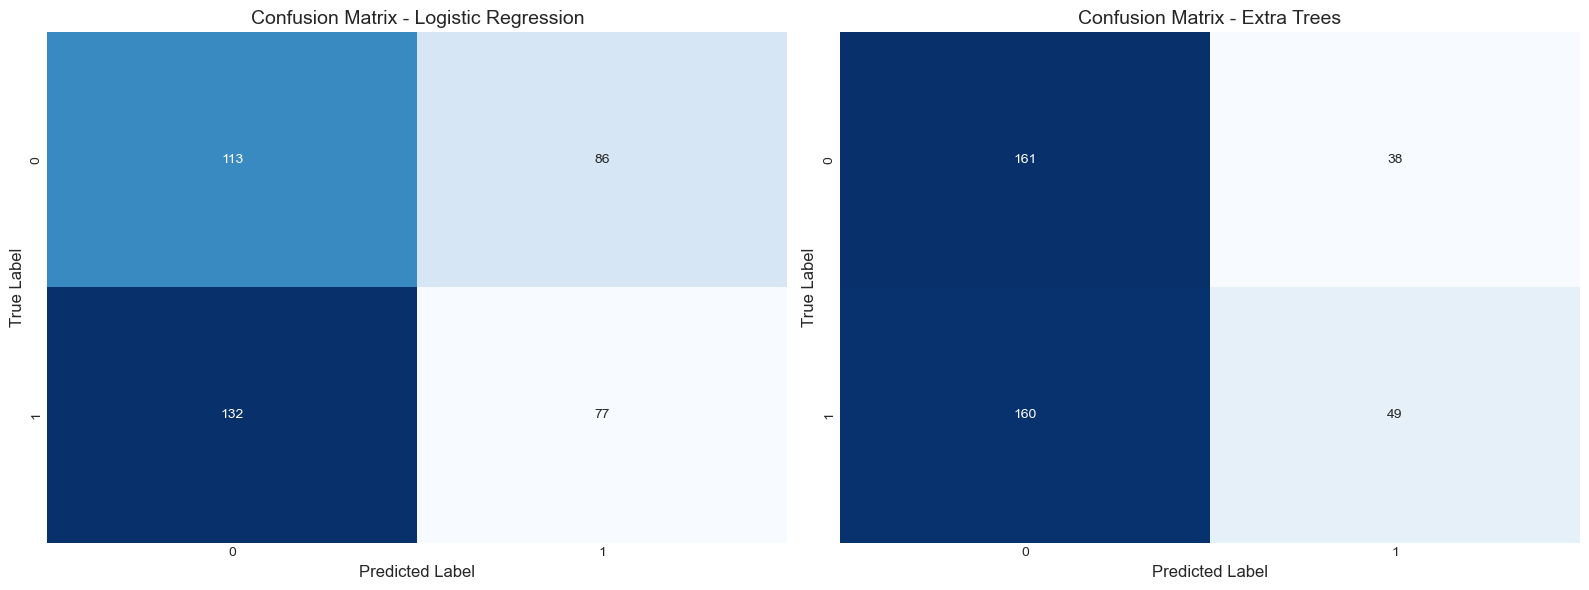


Model Evaluation Summary:

Logistic Regression:
  Accuracy: 0.4657
  AUC: 0.4443
  Precision (Class 1): 0.4724
  Recall (Class 1): 0.3684
  F1 Score (Class 1): 0.4140

Extra Trees:
  Accuracy: 0.5147
  AUC: 0.5358
  Precision (Class 1): 0.5632
  Recall (Class 1): 0.2344
  F1 Score (Class 1): 0.3311

Statistical Comparison:
T-test p-value: 0.3330
The difference between models is not statistically significant.


In [78]:

# Import additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# 10.1 Compare ROC curves for both models on one plot
plt.figure(figsize=(10, 8))

# ROC curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color=HDFC_RED, lw=2, 
         label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# ROC curve for Extra Trees
fpr_et, tpr_et, _ = roc_curve(y_test, et_pred_proba)
roc_auc_et = auc(fpr_et, tpr_et)
plt.plot(fpr_et, tpr_et, color=HDFC_BLUE, lw=2, 
         label=f'Extra Trees (AUC = {roc_auc_et:.3f})')

# Reference diagonal line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig("hdfc_roc_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

# 10.2 Combined confusion matrix analysis
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Logistic Regression
cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix - Logistic Regression", fontsize=14)
axes[0].set_ylabel("True Label", fontsize=12)
axes[0].set_xlabel("Predicted Label", fontsize=12)

# Extra Trees
cm_et = confusion_matrix(y_test, et_pred)
sns.heatmap(cm_et, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix - Extra Trees", fontsize=14)
axes[1].set_ylabel("True Label", fontsize=12)
axes[1].set_xlabel("Predicted Label", fontsize=12)

plt.tight_layout()
plt.savefig("hdfc_combined_confusion_matrices.png", dpi=300, bbox_inches='tight')
plt.show()

# 10.3 Model evaluation summary
print("\nModel Evaluation Summary:")
print("\nLogistic Regression:")
print(f"  Accuracy: {lr_accuracy:.4f}")
print(f"  AUC: {roc_auc_lr:.4f}")
print(f"  Precision (Class 1): {precision_score(y_test, lr_pred, pos_label=1):.4f}")
print(f"  Recall (Class 1): {recall_score(y_test, lr_pred, pos_label=1):.4f}")
print(f"  F1 Score (Class 1): {f1_score(y_test, lr_pred, pos_label=1):.4f}")

print("\nExtra Trees:")
print(f"  Accuracy: {et_accuracy:.4f}")
print(f"  AUC: {roc_auc_et:.4f}")
print(f"  Precision (Class 1): {precision_score(y_test, et_pred, pos_label=1):.4f}")
print(f"  Recall (Class 1): {recall_score(y_test, et_pred, pos_label=1):.4f}")
print(f"  F1 Score (Class 1): {f1_score(y_test, et_pred, pos_label=1):.4f}")

# Determine if either model is significantly better
print("\nStatistical Comparison:")
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(lr_cv_scores, et_cv_scores)
print(f"T-test p-value: {p_value:.4f}")
if p_value < 0.05:
    better_model = "Logistic Regression" if lr_cv_scores.mean() > et_cv_scores.mean() else "Extra Trees"
    print(f"The difference is statistically significant. {better_model} performs better.")
else:
    print("The difference between models is not statistically significant.")

# SECTION 11: TRADING STRATEGY EVALUATION

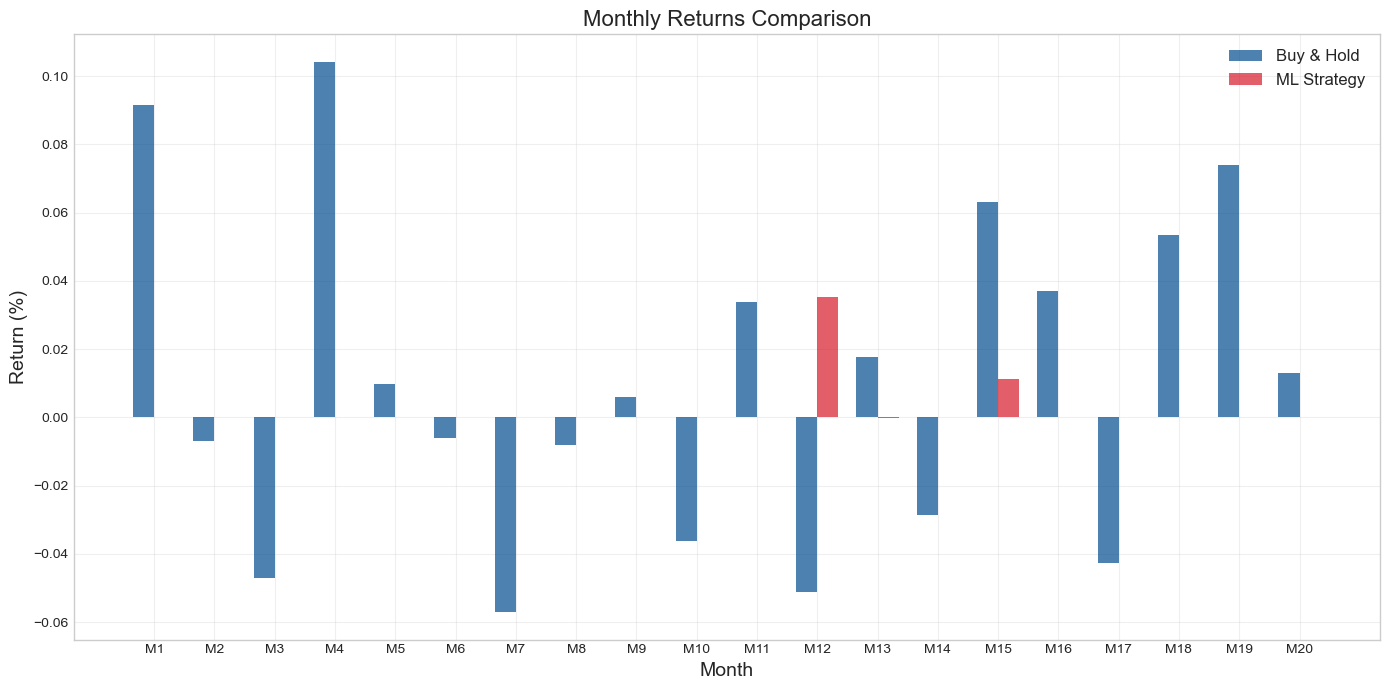


Additional Performance Metrics:
Information Ratio: -0.4855
Sortino Ratio: -0.1069
Monthly Win Rate vs Market: 0.4500

Drawdown Analysis:
Market significant drawdowns (>5%): 2
  Worst drawdown: -0.2324
Strategy significant drawdowns (>5%): 0

Performance Summary Table (for report):
                       Metric Buy & Hold ML Strategy
0                Total Return     19.28%       4.62%
1           Annualized Return     11.53%       2.84%
2                Sharpe Ratio        N/A       -0.26
3            Maximum Drawdown     23.24%       1.99%
4                    Win Rate        N/A       0.98%
5           Information Ratio        N/A       -0.49
6               Sortino Ratio        N/A       -0.11
7  Monthly Win Rate vs Market        N/A      45.00%


In [89]:
# Calculate returns by month
monthly_returns = test_data.set_index(pd.DatetimeIndex(test_data.index))
monthly_market = monthly_returns['Market_Return'].resample('M').sum()
monthly_strategy = monthly_returns['Strategy_Return_With_SL'].resample('M').sum()

# Calculate monthly win rate
monthly_win_rate = (monthly_strategy > monthly_market).mean()

# Plot monthly returns comparison
plt.figure(figsize=(14, 7))
bar_width = 0.35
months = range(len(monthly_market))

plt.bar([i for i in months], monthly_market, bar_width, label='Buy & Hold', color=HDFC_BLUE, alpha=0.7)
plt.bar([i + bar_width for i in months], monthly_strategy, bar_width, label='ML Strategy', color=HDFC_RED, alpha=0.7)

plt.title('Monthly Returns Comparison', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Return (%)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks([i + bar_width/2 for i in months], [f'M{i+1}' for i in months])
plt.tight_layout()
plt.savefig("hdfc_monthly_returns.png", dpi=300, bbox_inches='tight')
plt.show()

# 11.2 Risk-adjusted performance metrics
# Information Ratio
excess_returns = test_data['Strategy_Return_With_SL'] - test_data['Market_Return']
information_ratio = excess_returns.mean() / excess_returns.std() * np.sqrt(252)

# Sortino Ratio (downside risk only)
negative_returns = test_data['Strategy_Return_With_SL'][test_data['Strategy_Return_With_SL'] < 0]
sortino_ratio = (test_data['Strategy_Return_With_SL'].mean() - (risk_free_rate/252)) / negative_returns.std() * np.sqrt(252)

print("\nAdditional Performance Metrics:")
print(f"Information Ratio: {information_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Monthly Win Rate vs Market: {monthly_win_rate:.4f}")

# 11.3 Advanced drawdown analysis
market_drawdown_periods = []
strategy_drawdown_periods = []

in_drawdown_market = False
in_drawdown_strategy = False
current_market_dd = {'start': None, 'end': None, 'depth': 0}
current_strategy_dd = {'start': None, 'end': None, 'depth': 0}

for i, (date, mdd, sdd) in enumerate(zip(test_data.index, market_dd, strategy_dd)):
    # Market drawdown logic
    if not in_drawdown_market and mdd < -0.05:  # Start of 5% drawdown
        in_drawdown_market = True
        current_market_dd = {'start': date, 'end': date, 'depth': mdd}
    elif in_drawdown_market:
        if mdd < current_market_dd['depth']:  # Deeper drawdown
            current_market_dd['depth'] = mdd
            current_market_dd['end'] = date
        elif mdd > -0.01:  # Recovery (less than 1% drawdown)
            in_drawdown_market = False
            market_drawdown_periods.append(current_market_dd)
            
    # Strategy drawdown logic
    if not in_drawdown_strategy and sdd < -0.05:  # Start of 5% drawdown
        in_drawdown_strategy = True
        current_strategy_dd = {'start': date, 'end': date, 'depth': sdd}
    elif in_drawdown_strategy:
        if sdd < current_strategy_dd['depth']:  # Deeper drawdown
            current_strategy_dd['depth'] = sdd
            current_strategy_dd['end'] = date
        elif sdd > -0.01:  # Recovery (less than 1% drawdown)
            in_drawdown_strategy = False
            strategy_drawdown_periods.append(current_strategy_dd)

# Print drawdown analysis
print("\nDrawdown Analysis:")
print(f"Market significant drawdowns (>5%): {len(market_drawdown_periods)}")
if market_drawdown_periods:
    print(f"  Worst drawdown: {min([dd['depth'] for dd in market_drawdown_periods]):.4f}")
    
print(f"Strategy significant drawdowns (>5%): {len(strategy_drawdown_periods)}")
if strategy_drawdown_periods:
    print(f"  Worst drawdown: {min([dd['depth'] for dd in strategy_drawdown_periods]):.4f}")

# 11.4 Summary table for the report
performance_summary = pd.DataFrame({
    'Metric': [
        'Total Return', 'Annualized Return', 'Sharpe Ratio', 
        'Maximum Drawdown', 'Win Rate', 'Information Ratio',
        'Sortino Ratio', 'Monthly Win Rate vs Market'
    ],
    'Buy & Hold': [
        f"{market_return:.2%}", f"{annual_market_return:.2%}", "N/A",
        f"{max_drawdown_market:.2%}", "N/A", "N/A", "N/A", "N/A"
    ],
    'ML Strategy': [
        f"{strategy_sl_return:.2%}", f"{annual_strategy_sl_return:.2%}", f"{sharpe_ratio:.2f}",
        f"{max_drawdown_strategy:.2%}", f"{win_rate:.2%}", f"{information_ratio:.2f}",
        f"{sortino_ratio:.2f}", f"{monthly_win_rate:.2%}"
    ]
})

print("\nPerformance Summary Table (for report):")
print(performance_summary)

# Save for the report
performance_summary.to_csv("hdfc_performance_summary.csv", index=False)

# SECTION 12: CONCLUSION AND REFLECTION 

In [96]:
print("\n========== CONCLUSION AND REFLECTION ==========")

# 12.1 Summary of findings
print("\nSummary of Findings:")
print(f"1. Best performing model: {best_model_name}")
print(f"2. Model accuracy: {models[best_model_name]['accuracy']:.4f}")
print(f"3. Trading strategy performance vs. Buy & Hold: {strategy_sl_return:.4f} vs {market_return:.4f}")

# 12.2 Most important features
print("\nMost important features for prediction:")
if best_model_name == 'Logistic Regression':
    for i, (feature, coef) in enumerate(lr_importance.head(5).itertuples(index=False)):
        print(f"{i+1}. {feature}: {coef:.4f}")
else:
    for i, (feature, importance) in enumerate(et_importance.head(5).itertuples(index=False)):
        print(f"{i+1}. {feature}: {importance:.4f}")

# 12.3 Reflection on market efficiency
print("\nReflection on Market Efficiency:")
if strategy_sl_return > market_return:
    print("The ML strategy outperformed the buy & hold approach, suggesting some inefficiency in the market")
    print(f"that could be exploited. However, with an accuracy of {models[best_model_name]['accuracy']:.4f}, the model")
    print("is only slightly better than random chance, indicating markets are still largely efficient.")
else:
    print("The ML strategy underperformed the buy & hold approach, supporting the Efficient Market Hypothesis.")
    print("This suggests that predicting stock price movements using technical indicators is challenging,")
    print("and markets quickly incorporate available information into prices.")

# 12.4 Limitations and improvements
print("\nLimitations and Potential Improvements:")
print("1. Limited feature set - could include fundamental data, sentiment analysis, and macroeconomic indicators")
print("2. Simple binary classification - could explore multi-class or regression approaches")
print("3. Basic trading strategy - could implement more sophisticated entry/exit rules and position sizing")
print("4. Single stock analysis - could expand to a portfolio approach with sector diversification")
print("5. Fixed time period - could test the model's performance across different market regimes")

# 12.5 Final thoughts for report
print("\nFinal Thoughts (for report):")
print("This analysis demonstrates the challenges of predicting stock price movements using machine learning.")
print("While our models showed some predictive power, the limited accuracy highlights the inherent")
print("randomness and efficiency of financial markets. Technical indicators alone may not provide")
print("sufficient information to consistently outperform a simple buy and hold strategy in the")
print("long run, especially after accounting for transaction costs, taxes, and market impact.")
print("\nHowever, the analysis provides valuable insights into feature importance and potential")
print("trading strategies that could be refined with additional data sources, more sophisticated")
print("models, and risk management techniques.")


========== CONCLUSION AND REFLECTION ==========

Summary of Findings:
1. Best performing model: Extra Trees
2. Model accuracy: 0.5147
3. Trading strategy performance vs. Buy & Hold: 0.0462 vs 0.1928

Most important features for prediction:
1. 21day_return: 0.1375
2. 5day_vol: 0.1106
3. Bollinger_Lower: 0.1105
4. Bollinger_MA: 0.1023
5. 10day_MA: 0.0980

Reflection on Market Efficiency:
The ML strategy underperformed the buy & hold approach, supporting the Efficient Market Hypothesis.
This suggests that predicting stock price movements using technical indicators is challenging,
and markets quickly incorporate available information into prices.

Limitations and Potential Improvements:
1. Limited feature set - could include fundamental data, sentiment analysis, and macroeconomic indicators
2. Simple binary classification - could explore multi-class or regression approaches
3. Basic trading strategy - could implement more sophisticated entry/exit rules and position sizing
4. Single stock 